## **<center>S&P 500 Historical Data Analysis Utilizing yfinance</center>**

## Table of Contents

* [Introduction](#Intro)
* [Overview](#Overview)
* [Data Preparation](#DataP)
* [Data Processing](#DataPro)
* [Data Analysis](#DataAna)
    - [Descriptive Analysis](#Sub-1)
        - [Summary Statistics](#Sub-1a)
    - [Data Visualization](#Sub-2)
* [Summary](#Summary)

<a id="Intro"></a>
# **Introduction**

This document is comprised of the analysis performed on S&P 500 historical data. This document will provide an overview of the S&P 500, and a step-by-step walk through of data preparation, processing, and analysis.

Skills utilized for this analysis were obtained from [IBM's Data Science Professional Certificate](https://www.edx.org/professional-certificate/ibm-data-science) coursework provided by EdX and [Google's Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) coursework provided by Coursera.

<a id="Overview"></a>
# **Overview**

The Standard and Poor's 500 or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. As of December 31, 2020, more than 5.4 trillion was invested in assets tied to the performance of the index. The S&P 500 index is a free-float weighted/capitalization-weighted index. The index is associated with many ticker symbols, including ^GSPC, INX, and  $SPX, depending on market or website.

This information was obtained from [S&P500 Wikipedia page](https://en.wikipedia.org/wiki/S%26P_500#cite_note-9).

<a id="DataP"></a>
# **Data Preparation**

The section details the data preparation utilized for this analysis. The raw S&P 500 data will be pulled from Yahoo Finance historical data utilizing the 'yfinance' API package in Python 3.

The yfinance python package will be installed so that historical S&P 500 data can be pulled from Yahoo's APIs.

In [1]:
# Install yfinance package
try:
    print("Loading 'yfinance' library...")
    !pip install yfinance --quiet
except (Exception, ImportError, Error) as error:
    print("An error occurred while trying to load the 'yfinance' library. The specific error information is: \n",error)
finally:
    print("yfinance has been successfully loaded!")

Loading 'yfinance' library...
yfinance has been successfully loaded!


The packages required for data analysis and visualization will be imported.

In [2]:
# import packages required for analysis
try:
    print("Importing packages...")
    import numpy as np # mathematical functions
    import pandas as pd # data processing
    import yfinance as yf # To pull historical data from Yahoo Finance
    import matplotlib as mpl
    import matplotlib.pyplot as plt # For plotting data and to allow for plots to display in notebook (inline)
    %matplotlib inline
    mpl.style.use(['ggplot'])
    from IPython.display import display # display multiple tables in notebook output
    from scipy import stats  #Statistical package
    import seaborn as sns # regression plots
    from sklearn.linear_model import LinearRegression # Perform linear regression
except ImportError as error:
    print("An error occurred while trying to import the required packages. The specific error information is: \n",error)
finally:
    print("Modules have been successfully loaded!")

Importing packages...
Modules have been successfully loaded!


The Yahoo API will be called to pull the historical data for the S&P500 with ticker symbol ^GSPC. This data will be stored in a dataframe.

In [3]:
#Pull Ticker file with S&P 500 information
tckr = yf.Ticker("^GSPC")

#Pull historical data for S&P 500 and stored in dataframe
data = tckr.history(period="max")

#Reset index for later processing also allows for dataframe to be queried by date
data.reset_index(inplace=True)

print("The historical data for symbol {0} was obtained. This symbol is traded on exchange {1}."
      .format(tckr.info["shortName"],tckr.info["exchange"]))

The historical data for symbol S&P 500 was obtained. This symbol is traded on exchange SNP.


The S&P500 data spans multiple decades. The exact start and end dates are shown below. 

In [4]:
#Indicate the first and last date of data to ensure it captures the correct time length
print("The first date of {0} data is: \t {1} \nThe last date of {0} data is: \t {2}"
     .format(tckr.info["shortName"],data.loc[0,"Date"].date(),data.at[len(data)-1,"Date"].date()))

The first date of S&P 500 data is: 	 1950-01-03 
The last date of S&P 500 data is: 	 2022-04-18


A summary of basic statistics is provided below. Note that it appears that there are "Open" columns that have zero as there value. All of the columns have the same amount of rows.

In [5]:
#Provide summary statistics for data
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,18191.000000,18191.000000,18191.000000,18191.000000,1.819100e+04,18191.0,18191.0
mean,678.488258,709.047914,700.495303,705.052985,1.064867e+09,0.0,0.0
std,937.834808,924.428837,914.216884,919.678959,1.669042e+09,0.0,0.0
min,0.000000,16.660000,16.660000,16.660000,6.800000e+05,0.0,0.0
25%,0.000000,88.169998,86.795002,87.449997,9.830000e+06,0.0,0.0
50%,228.630005,232.229996,225.750000,228.690002,1.239000e+08,0.0,0.0
75%,1165.869995,1174.695007,1157.744995,1165.880005,1.516380e+09,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


The raw data will be saved in a dataframe. Note that further processing will handled in the "Data Processing" section.

In [6]:
#Write raw data to csv file
try:
    print("Saving raw dataframe to csv file...")
    data.to_csv("./{0}_day_data_raw.csv".format(tckr.info["exchange"]))
except:
    print("And error occurred while trying to save data to csv file")
finally:
    print("Raw dataset has been successfully saved to csv file")

Saving raw dataframe to csv file...
Raw dataset has been successfully saved to csv file


Two (2) functions were created; one will calculate the percent change between two values and the other will call for highlighting specific columns of a table. Note that these functions will be utilized in the "Data Processing" and "Data Analysis" section.

In [7]:
#Percent change
def p_chg(x1,x2):
    """
    This function will calculate the percent change between two values x1 and x2.
    x1 - Initial value
    x2 - Final value
    The output will be rounded to two decimal places
    """
    
    y = ((x2-x1)/x1)*100
    return y

#create function to highlight columns in table
def highlight_cols(s,color):
    return 'background-color: %s' % color

<a id="DataPro"></a>
# **Data Processing**

This section details the data processing for this analysis. The raw data mentioned above will be cleaned in preparation for data analysis and visualization. Data not required for this analysis was removed, new columns were created for weekday, month, and year, and the new columns were created for percent change for intraday price, open/close price, and changes in daily volume. 

The "Dividend" and "Stock Splits" columns will be removed as they have no meaningful data. The index ticker does not produce a dividend or split since it just tracks the index. 

In [8]:
#Remove unnecessary columns Dividends and Stock Split
data.drop(columns=['Dividends','Stock Splits'],inplace=True)

The resulting dataframe was queried to find the rows that contain a zero for the 'Open' value. This was noted as a discrepency in the data preparation section.

In [9]:
#There is "open" value data missing from dataframe, need to find out where data is missing
print("There are {0:,} rows with a zero value for the 'Open' column."
      .format(data[data['Open'] == 0].value_counts().count()))

There are 5,075 rows with a zero value for the 'Open' column.


The dataframe was updated to utilize the 'Close' value from the previous day if the 'Open' value is zero. This assumes that no extended market trading has taken place. Per [Investopedia](https://www.investopedia.com/ask/answers/06/preaftermarket.asp#:~:text=The%20New%20York%20Stock%20Exchange%20introduced%20after%2Dmarket%20trading%20in,offered%20more%20hours%20of%20trading.), after market trading on the NYSE was started in June 1991. Based on the below code, the last row with a zero 'Open' value was 4/19/1982.

In [10]:
print("The last row with an 'Open' value of zero was {0}.".format(data[data['Open'] == 0].tail(1).iloc[0]['Date'].date()))

The last row with an 'Open' value of zero was 1982-04-19.


In [11]:
#Iterate through each row of 'Open' column of dataframe, if Open == 0 then grab close from previous day and add to Open column 
#(assume no extended hr trading)
index = 0
for value in data['Open']:
    if value == 0:
        data.loc[index,'Open'] = data.loc[index-1,'Close'] 
    index +=1

Check to make sure all zero "Open" values have been updated.

In [12]:
#Check to make sure all Open rows have value
print("There are {0} rows with a zero value for the 'Open' column.".format(data[data['Open'] == 0].value_counts().count()))

There are 0 rows with a zero value for the 'Open' column.


New columns were created for the Month, Week in year, and Weekday. Columns were created for their names and numbers for easier processing later on.

In [13]:
#Add new columns for year, Month, Week, and Weekday
data = data.assign(Year = data['Date'].dt.year, M_num = data['Date'].dt.month, M_nm = data['Date'].dt.month_name(), 
                  D_num = data['Date'].dt.weekday, D_nm = data['Date'].dt.day_name(), Wk = data['Date'].dt.isocalendar().week)

New columns were created to calculate the percent change in the intraday value and the open/close value. These columns are calculated utilizing the "p_chg" function created above.

In [14]:
#Add new columns for percent change in intraday high/low and open/close
data = data.assign(P_intra = p_chg(data['Low'],data['High']),P_day = p_chg(data['Open'],data['Close']))

In [15]:
#There are daily percent changes that are 0, check to see how many
print("There are {0:,} rows (or {1:.2%} of total) where the daily percent change is zero. The last entry where the daily price change was zero was {2}."
      .format(data[data['P_day'] == 0].value_counts().count(),
              data[data['P_day'] == 0].value_counts().count()/data.value_counts().count(),
              data[data['P_day'] == 0]['Date'].tail(1).iloc[0].date()))

There are 3,084 rows (or 16.95% of total) where the daily percent change is zero. The last entry where the daily price change was zero was 2017-04-10.


In [16]:
#There are intraday percent changes that are 0, unsure if this is correct or data error
print("There are {0:,} rows where the intraday change is zero. The last entry where the intraday price change was zero was {1}."
      .format(data[data['P_intra'] == 0].value_counts().count(), data[data['P_intra'] == 0]['Date'].tail(1).iloc[0].date()))

There are 3,051 rows where the intraday change is zero. The last entry where the intraday price change was zero was 1983-06-30.


A new column was created to calculate the change in daily volume for the S&P500. This column is calculated utilizing the "p_chg" function created above.

In [17]:
for index in range(0,len(data['Volume'])-1):
    data.loc[index+1,'P_Vol'] = p_chg(data.loc[index,'Volume'],data.loc[index+1,'Volume'])

Two new columns were created to track the changes in the previous day closing value and the opening value on the next day. One column calculates the changes in price and the other calculates the percent change in price based on previous day closing value. These new columns account for any extended hour trading.

In [18]:
#Iterate through dataframe, checking for changes in previous closing vs opening and calculating difference (if applicable)
for index in range(0,len(data)-1):  
    if data.loc[index+1,'Open'] != data.loc[index,'Close']:
        data.loc[index+1,'Ex_trd'] = data.loc[index+1,'Open'] - data.loc[index,'Close']
        data.loc[index+1,'PEx_trd'] = p_chg(data.loc[index,'Close'],data.loc[index+1,'Open'])

In [19]:
print("There are {0:,} rows in this dataframe and there are {1:,} rows where the previous close price \
differed from the next day's opening price. That's approximately {2:.3f}% of the total trading days."
      .format(len(data),data["Ex_trd"].count(),data["Ex_trd"].count()/len(data)*100))

There are 18,191 rows in this dataframe and there are 8,232 rows where the previous close price differed from the next day's opening price. That's approximately 45.253% of the total trading days.


The cleaned and modified dataset was saved to a CSV file. This dataset will be utilized in the analysis and visualization sections.

In [20]:
#Write clean, processed data to csv file
try:
    print("Saving cleaned dataframe to csv file...")
    data.to_csv("./{0}_day_data_clean.csv".format(tckr.info["exchange"]))
except:
    print("And error occurred while trying to save data to csv file")
finally:
    print("Cleaned dataset has been successfully saved to csv file")

Saving cleaned dataframe to csv file...
Cleaned dataset has been successfully saved to csv file


A subset of the clean dataframe is shown below.

In [21]:
data.tail(10)

,Date,Open,High,Low,Close,Volume,Year,M_num,M_nm,D_num,D_nm,Wk,P_intra,P_day,P_Vol,Ex_trd,PEx_trd
18181,2022-04-04,4547.970215,4583.500000,4539.209961,4582.640137,3833500000,2022,4,April,0,Monday,14,0.975721,0.762316,0.136092,2.110352,0.046424
18182,2022-04-05,4572.450195,4593.450195,4514.169922,4525.120117,3906230000,2022,4,April,1,Tuesday,14,1.756254,-1.035114,1.897222,-10.189941,-0.222360
18183,2022-04-06,4494.169922,4503.939941,4450.040039,4481.149902,4137080000,2022,4,April,2,Wednesday,14,1.211223,-0.289709,5.909790,-30.950195,-0.683964
18184,2022-04-07,4474.649902,4521.160156,4450.299805,4500.209961,4054010000,2022,4,April,3,Thursday,14,1.592260,0.571219,-2.007938,-6.500000,-0.145052
18185,2022-04-08,4494.149902,4520.410156,4474.600098,4488.279785,3453040000,2022,4,April,4,Friday,14,1.023780,-0.130617,-14.824088,-6.060059,-0.134662
18186,2022-04-11,4462.640137,4464.350098,4408.379883,4412.529785,3452540000,2022,4,April,0,Monday,15,1.269632,-1.122886,-0.014480,-25.639648,-0.571258
18187,2022-04-12,4437.589844,4471.000000,4381.339844,4397.450195,3451990000,2022,4,April,1,Tuesday,15,2.046410,-0.904537,-0.015930,25.060059,0.567930
18188,2022-04-13,4394.299805,4453.919922,4392.700195,4446.589844,3273140000,2022,4,April,2,Wednesday,15,1.393670,1.189952,-5.181069,-3.150391,-0.071641
18189,2022-04-14,4449.120117,4460.459961,4390.770020,4392.589844,3634740000,2022,4,April,3,Thursday,15,1.587192,-1.270594,11.047496,2.530273,0.056904
18190,2022-04-18,4385.629883,4408.209961,4382.770020,4383.169922,700709346,2022,4,April,0,Monday,16,0.580453,-0.056091,-80.721885,-6.959961,-0.158448


<a id="DataAna"></a>
# **Data Analysis**

This section details the data analysis of the clean dataset. The goal of this analysis is to provide a summary of the historical S&P 500 data, highlighting major trends and key events. The first subsection performs descriptive analytics (i.e. max, mean, median, etc) and the second subsection provides a visual representation of the data. Note that seperate dataframes were created to aid in the analysis of the data.

<a id="Sub-1"></a>
## *Descriptive Analysis*

### **Yearly Summary**

A new dataframe was created to store the summarized yearly S&P 500 data. This data includes the yearly maximum and minimum close data, the average and median yearly close value, the yearly open and close data along with the annual percent change.

In [22]:
#Create new dataframe to store Year and Close values
df = data[['Year','Close']]

#Extract maximum and minimum values from each year, also capture yearly open and close values
yr_max = df.groupby(by = ['Year']).max().rename(columns={'Close': 'Max_close'})
yr_min = df.groupby(['Year']).min().rename(columns={'Close': 'Min_close'})
yr_avg = df.groupby(['Year']).mean().rename(columns={'Close': 'Avg_close'})
yr_med = df.groupby(['Year']).median().rename(columns={'Close': 'Med_close'})
yr_start = df.groupby(['Year']).head(1).rename(columns={'Close': 'Yr_open'})
yr_end = df.groupby(['Year']).tail(1).rename(columns={'Close': 'Yr_end'})

#Merge the data along with year into new a dataframe
yr_df = pd.merge(yr_max,yr_min,how = 'left', on = 'Year')
yr_df = yr_df.merge(yr_avg,how = 'left', on = 'Year')
yr_df = yr_df.merge(yr_med,how = 'left', on = 'Year')
yr_df = yr_df.merge(yr_start,how = 'left', on = 'Year')
yr_df = yr_df.merge(yr_end,how = 'left', on = 'Year')

for index in range(0,len(yr_df)-1):
    yr_df.loc[index+1,'P_yr'] = p_chg(yr_df.loc[index,'Yr_end'],yr_df.loc[index+1,'Yr_end'])   

The dates for the maximum and minimum closing values were added to the dataframe.

In [23]:
for year in yr_df['Year']: #Iterate through each year in yr_df dataframe
    i = int(yr_df[yr_df["Year"] == year].index.values) #pull index value for yr_df  
    for index in range(0,len(data)-1):  #Iterate through each row in data dataframe           
        if int(data.loc[index,'Year']) == int(year): # If 'year' from yr_df equal 'year' from data df look for matching value        
            if float(data.loc[index,'Close']) == float(yr_df.loc[i,'Max_close']): #Looking for matching 'Max' value
                yr_df.loc[i,"Max_date"] = data.loc[index,"Date"]
            elif float(data.loc[index,'Close']) == float(yr_df.loc[i,'Min_close']): #Looking for matching 'Min' value
                yr_df.loc[i,"Min_date"] = data.loc[index,"Date"]
        else:
            continue

The summarized yearly data was saved to a csv file.

In [24]:
try:
    print("Saving yearly dataframe to csv file...")
    yr_df.to_csv("./{0}_yr_data.csv".format(tckr.info["exchange"]))
except:
    print("And error occurred while trying to save data to csv file")
finally:
    print("Yearly data has been successfully saved to csv file")

Saving yearly dataframe to csv file...
Yearly data has been successfully saved to csv file


An overview of the dataframe is presented below.

In [25]:
yr_df.tail(10)

,Year,Max_close,Min_close,Avg_close,Med_close,Yr_open,Yr_end,P_yr,Min_date,Max_date
63,2013,1848.359985,1457.150024,1643.798968,1650.404968,1462.420044,1848.359985,29.601250,2013-01-08,2013-12-31
64,2014,2090.570068,1741.890015,1931.376110,1937.350037,1831.979980,2058.899902,11.390634,2014-02-03,2014-12-29
65,2015,2130.820068,1867.609985,2061.067741,2079.395020,2058.199951,2043.939941,-0.726600,2015-08-25,2015-05-21
66,2016,2271.719971,1829.079956,2094.651264,2104.104980,2012.660034,2238.830078,9.535023,2016-02-11,2016-12-13
67,2017,2690.159912,2257.830078,2449.076379,2436.100098,2257.830078,2673.610107,19.419966,2017-01-03,2017-12-18
68,2018,2930.750000,2351.100098,2746.214183,2743.149902,2695.810059,2506.850098,-6.237260,2018-12-24,2018-09-20
69,2019,3240.020020,2447.889893,2913.356380,2919.024902,2510.030029,3230.780029,28.878070,2019-01-03,2019-12-27
70,2020,3756.070068,2237.399902,3217.855849,3276.020020,3257.850098,3756.070068,16.258923,2020-03-23,2020-12-31
71,2021,4793.060059,3700.649902,4273.385635,4304.000000,3700.649902,4766.180176,26.892739,2021-01-04,2021-12-29
72,2022,4796.560059,4170.700195,4464.583958,4471.069824,4796.560059,4383.169922,-8.036000,2022-03-08,2022-01-03


### **Monthly Summary**

A new dataframe was created to store the summarized monthly S&P 500 data. This data includes the monthly maximum, minimum, average, and standard deviation for daily close values and intraday values.

In [26]:
df = data[['M_nm','P_day', 'P_intra']] 

#Extract maximum, minimum, mean, and standard deviation values from each month
mnth_max = df.groupby(by = ['M_nm'], sort=False).max().rename(columns={'P_day': 'Max_P_day','P_intra': 'Max_P_intra'})
mnth_min = df.groupby(by = ['M_nm'], sort=False).min().rename(columns={'P_day': 'Min_P_day','P_intra': 'Min_P_intra'})
mnth_avg = df.groupby(['M_nm'], sort=False).mean().rename(columns={'P_day': 'Avg_P_day','P_intra': 'Avg_P_intra'})
mnth_std = df.groupby(['M_nm'], sort=False).std().rename(columns={'P_day': 'Std_P_day','P_intra': 'Std_P_intra'})

#Merge the data along with month into new a dataframe
mnth_df = pd.merge(mnth_max, mnth_min, on = "M_nm")
mnth_df = mnth_df.merge(mnth_avg, on = 'M_nm')
mnth_df = mnth_df.merge(mnth_std, on = 'M_nm')

mnth_df.reset_index(inplace=True)
mnth_df

,M_nm,Max_P_day,Max_P_intra,Min_P_day,Min_P_intra,Avg_P_day,Avg_P_intra,Std_P_day,Std_P_intra
0,January,5.009861,7.458329,-6.761155,0.0,0.038523,1.245930,0.871240,0.926248
1,February,3.820383,5.475157,-4.580851,0.0,0.006460,1.181049,0.806541,0.837601
2,March,6.553066,8.785210,-5.709928,0.0,0.043366,1.223555,0.935649,1.017543
3,April,4.367998,7.768931,-5.827794,0.0,0.053778,1.154862,0.822593,0.836249
4,May,5.022364,9.712027,-6.675637,0.0,0.007704,1.140709,0.819598,0.866461
5,June,3.441067,5.795180,-3.887586,0.0,-0.004358,1.099841,0.774244,0.781992
6,July,5.731402,8.849012,-3.835246,0.0,0.026861,1.102356,0.791070,0.823834
7,August,4.668689,7.959002,-6.801408,0.0,0.007618,1.130883,0.882533,0.899985
8,September,5.089898,9.277661,-8.489989,0.0,-0.027243,1.192303,0.931440,0.966063
9,October,10.789006,25.739452,-20.466931,0.0,0.032866,1.382272,1.270655,1.466072


Based on the above table, it appears that the month of October has significantly higher daily price variation compared to the other months. The cleaned dataframe was queried to find the dates of the maximum and minimum price changes in October. 

In [27]:
print("The maximum October daily price change of {0:.3f}% occurred on {1}. The minimum October daily price change of {2:.3f}% occurred on {3}."
     .format(data[(data['P_day'] == data['P_day'].max()) & (data['M_nm'] == "October")]['P_day'].iloc[0], 
             data[(data['P_day'] == data['P_day'].max()) & (data['M_nm'] == "October")]['Date'].iloc[0].date(),
             data[(data['P_day'] == data['P_day'].min()) & (data['M_nm'] == "October")]['P_day'].iloc[0], 
             data[(data['P_day'] == data['P_day'].min()) & (data['M_nm'] == "October")]['Date'].iloc[0].date()))

The maximum October daily price change of 10.789% occurred on 2008-10-28. The minimum October daily price change of -20.467% occurred on 1987-10-19.


A new dataframe was created to remove these values to determine their effect on the October values.

In [28]:
# Remove Black Friday and 2008 GFC data from mnth_df
# find index value for both October max and min
mth_max = data[(data['P_day'] == data['P_day'].max()) & (data['M_nm'] == "October")].index[0]
mth_min =data[(data['P_day'] == data['P_day'].min()) & (data['M_nm'] == "October")].index[0]

data2 = data.drop(labels = [mth_min, mth_max], axis = 0) # drop two rows from data df

df = data2[['M_nm','P_day', 'P_intra']] #recreate dataframe

#Extract maximum, minimum, mean, and standard deviation values from each month
mnth_max = df.groupby(by = ['M_nm'], sort=False).max().rename(columns={'P_day': 'Max_P_day','P_intra': 'Max_P_intra'})
mnth_min = df.groupby(by = ['M_nm'], sort=False).min().rename(columns={'P_day': 'Min_P_day','P_intra': 'Min_P_intra'})
mnth_avg = df.groupby(['M_nm'], sort=False).mean().rename(columns={'P_day': 'Avg_P_day','P_intra': 'Avg_P_intra'})
mnth_std = df.groupby(['M_nm'], sort=False).std().rename(columns={'P_day': 'Std_P_day','P_intra': 'Std_P_intra'})

#Merge the data along with month into new a dataframe
mnth2_df = pd.merge(mnth_max, mnth_min, on = "M_nm")
mnth2_df = mnth2_df.merge(mnth_avg, on = 'M_nm')
mnth2_df = mnth2_df.merge(mnth_std, on = 'M_nm')

mnth2_df.reset_index(inplace=True)

The rows for the month of October from the original dataframe and the modified dataframe were combined into a table. Note that after removing the two rows, the monthly values are more inline with the remaining months although they are still elevated - the standard deviation for price changes is still above 1% which is the only month that this occurs.

In [29]:
pd.concat([mnth_df[mnth_df['M_nm'] == 'October'], mnth2_df[mnth2_df['M_nm'] == 'October']], keys=['Original','Oct Max/Min Removed'])

,,M_nm,Max_P_day,Max_P_intra,Min_P_day,Min_P_intra,Avg_P_day,Avg_P_intra,Std_P_day,Std_P_intra
Original,9,October,10.789006,25.739452,-20.466931,0.0,0.032866,1.382272,1.270655,1.466072
Oct Max/Min Removed,9,October,9.926045,13.471305,-8.723100,0.0,0.039025,1.360627,1.130302,1.309411


Another dataframe was created to capture the opening and closing values for each year and month respectively. In addition, the average and median closing values were calculated and the monthly percent change was calculated. The dataframe will be utilized in the summary statistics section.

In [30]:
df = data[['Year','M_nm', 'Close']]

#Extract start, end, mean, and standard deviation values from each month for each year
m_start = df.groupby(['Year','M_nm']).head(1).rename(columns={'Close': 'M_open'})
m_end = df.groupby(['Year','M_nm']).tail(1).rename(columns={'Close': 'M_end'})
m_avg = df.groupby(['Year','M_nm'],sort = False, as_index = False).mean().rename(columns={'Close': 'M_avg'})
m_med = df.groupby(['Year','M_nm'],sort = False,as_index = False).median().rename(columns={'Close': 'M_median'})

#Merge the data along with year/month into new a dataframe
m_df = pd.merge(m_start, m_end)
m_df = m_df.merge(m_avg)
m_df = m_df.merge(m_med)

for index in range(0,len(m_df)-1): #Calculate monthly percent change
    m_df.loc[index,'P_mnth'] = p_chg(m_df.loc[index,'M_open'],m_df.loc[index,'M_end'])

### **Weekly Summary**

A new dataframe was created to store the summarized weekly S&P 500 data. This data includes the daily maximum, minimum, average, and standard deviation for daily close values and intraday values.

In [31]:
df = data[['Wk','P_day','P_intra']]

#Extract maximum, minimum, mean, and standard deviation values from each week
wk_max = df.groupby(by = ['Wk'], sort=False).max().rename(columns={'P_day': 'Max_P_day','P_intra': 'Max_P_intra'})
wk_min = df.groupby(by = ['Wk'], sort=False).min().rename(columns={'P_day': 'Min_P_day','P_intra': 'Min_P_intra'})
wk_avg = df.groupby(['Wk'], sort=False).mean().rename(columns={'P_day': 'Avg_P_day','P_intra': 'Avg_P_intra'})
wk_std = df.groupby(['Wk'], sort=False).std().rename(columns={'P_day': 'Std_P_day','P_intra': 'Std_P_intra'})

#Merge the data along with week into new a dataframe
wk_df = pd.merge(wk_max,wk_min,on='Wk')
wk_df = wk_df.merge(wk_avg,on='Wk')
wk_df = wk_df.merge(wk_std,on='Wk')

wk_df.reset_index(inplace=True)

Another dataframe was created to capture the opening and closing values for each year and week respectively. In addition, the average and median closing values were calculated and the weekly percent change was calculated. The dataframe will be utilized in the summary statistics section.

In [32]:
df = data[['Year','Wk', 'Close']]

#Extract start, end, mean, and standard deviation values from each week
w_start = df.groupby(['Year','Wk']).head(1).rename(columns={'Close': 'Wk_open'})
w_end = df.groupby(['Year','Wk']).tail(1).rename(columns={'Close': 'Wk_end'})
w_avg = df.groupby(['Year','Wk'],sort = False,as_index = False).mean().rename(columns={'Close': 'Wk_avg'})
w_med = df.groupby(['Year','Wk'],sort = False,as_index = False).median().rename(columns={'Close': 'Wk_median'})

#Merge the data along with week/year into new a dataframe
w_df = pd.merge(w_start, w_end)
w_df = w_df.merge(w_avg)
w_df = w_df.merge(w_med)

for index in range(0,len(w_df)-1): #Calculate monthly percent change
    w_df.loc[index,'P_wk'] = p_chg(w_df.loc[index,'Wk_open'],w_df.loc[index,'Wk_end'])

### **Daily Summary**

A new dataframe was created to store the summarized weekday S&P 500 data. This data includes the daily maximum, minimum, average, and standard deviation for daily close values and intraday values.

In [33]:
df = data[['D_nm','P_day','P_intra']]

#Extract maximum, minimum, mean, and standard deviation values from each weekday
d_max = df.groupby(by = ['D_nm'], sort=False).max().rename(columns={'P_day': 'Max_P_day','P_intra': 'Max_P_intra'})
d_min = df.groupby(by = ['D_nm'], sort=False).min().rename(columns={'P_day': 'Min_P_day','P_intra': 'Min_P_intra'})
d_avg = df.groupby(['D_nm'], sort=False).mean().rename(columns={'P_day': 'Avg_P_day','P_intra': 'Avg_P_intra'})
d_std = df.groupby(['D_nm'], sort=False).std().rename(columns={'P_day': 'Std_P_day','P_intra': 'Std_P_intra'})

#Merge the data along with weekday into new a dataframe
dy_df = pd.merge(d_max,d_min,on='D_nm')
dy_df = dy_df.merge(d_avg,on='D_nm')
dy_df = dy_df.merge(d_std,on='D_nm')

index_dy = ['Monday','Tuesday','Wednesday','Thursday','Friday'] # Reorder index

dy_df = dy_df.reindex(index_dy)
dy_df.reset_index(inplace=True)
dy_df

,D_nm,Max_P_day,Max_P_intra,Min_P_day,Min_P_intra,Avg_P_day,Avg_P_intra,Std_P_day,Std_P_intra
0,Monday,9.926045,25.739452,-20.466931,0.0,-0.035371,1.175303,1.023271,1.059073
1,Tuesday,10.789006,13.471305,-5.802761,0.0,0.038271,1.195925,0.901505,0.960096
2,Wednesday,9.099355,10.023339,-8.723100,0.0,0.054477,1.180856,0.867762,0.932266
3,Thursday,6.817246,11.520845,-7.941968,0.0,0.024786,1.191837,0.879856,0.961819
4,Friday,5.846476,11.497976,-6.761155,0.0,0.035102,1.151471,0.827065,0.910888


Note that the standard deviation for 'Monday' is significantly higher than the remaining days of the week. This could potentially be due to the large minimum value of -20.46%. From the month analysis above we know when this price dropped occurred. This value will be removed to determine its effect.

In [34]:
dy_min =data[(data['P_day'] == data['P_day'].min()) & (data['M_nm'] == "October")].index[0] # find index value for row

data2 = data.drop(labels = [dy_min], axis = 0) # drop row from df

df = data2[['D_nm','P_day','P_intra']] #create new df with row dropped

#Extract maximum, minimum, mean, and standard deviation values from each weekday
d_max = df.groupby(by = ['D_nm'], sort=False).max().rename(columns={'P_day': 'Max_P_day','P_intra': 'Max_P_intra'})
d_min = df.groupby(by = ['D_nm'], sort=False).min().rename(columns={'P_day': 'Min_P_day','P_intra': 'Min_P_intra'})
d_avg = df.groupby(['D_nm'], sort=False).mean().rename(columns={'P_day': 'Avg_P_day','P_intra': 'Avg_P_intra'})
d_std = df.groupby(['D_nm'], sort=False).std().rename(columns={'P_day': 'Std_P_day','P_intra': 'Std_P_intra'})

#Merge the data along with weekday into new a dataframe
dy_df2 = pd.merge(d_max,d_min,on='D_nm')
dy_df2 = dy_df2.merge(d_avg,on='D_nm')
dy_df2 = dy_df2.merge(d_std,on='D_nm')

index_dy = ['Monday','Tuesday','Wednesday','Thursday','Friday'] # Reorder index

dy_df2 = dy_df2.reindex(index_dy)
dy_df2.reset_index(inplace=True)

By removing the lowest datapoint, we see a slight decrease in the daily standard deviation for price. Note that Monday daily price variation still remains elevated in comparison to the remaining weekdays. There have been four (4) ['Black Mondays'](https://www.thebalance.com/what-is-black-monday-in-1987-1929-and-2015-3305818) that have resulted in large stock market declines.

In [35]:
pd.concat([dy_df.iloc[0:1,:],dy_df2.iloc[0:1,:]],keys = ['Original','Excluded Min Value'])

,,D_nm,Max_P_day,Max_P_intra,Min_P_day,Min_P_intra,Avg_P_day,Avg_P_intra,Std_P_day,Std_P_intra
Original,0,Monday,9.926045,25.739452,-20.466931,0.0,-0.035371,1.175303,1.023271,1.059073
Excluded Min Value,0,Monday,9.926045,10.318268,-8.489989,0.0,-0.029510,1.168256,0.963102,0.974047


<a id="Sub-1a"></a>
### **Summary Statistics**

In [36]:
print("The average {0} daily percent return is {1:.3f}%.".format(tckr.info["shortName"],data['P_day'].mean()))

The average S&P 500 daily percent return is 0.024%.


The amount of daily price changes greater than 1% is calculated below.

In [37]:
df = data[['M_nm','P_day']]#pull rows from data df into new df

#count percent changes and group by month
g_1 = df.groupby(by=["M_nm"],sort = False).apply(lambda x: x[(x['P_day'] >= 1) & 
                                                             (x['P_day'] < 2.5)].count()).drop(['M_nm'], axis =1).rename(columns={'P_day':'Chg > 1%'})
g_25 = df.groupby(by=["M_nm"],sort = False).apply(lambda x: x[(x['P_day'] >= 2.5) & 
                                                              (x['P_day'] < 5)].count()).drop(['M_nm'], axis =1).rename(columns={'P_day':'Chg > 2.5%'})
g_5 = df.groupby(by=["M_nm"],sort = False).apply(lambda x: x[(x['P_day'] >= 5) & 
                                                             (x['P_day'] < 10)].count()).drop(['M_nm'], axis =1).rename(columns={'P_day':'Chg > 5%'})
g_10 = df.groupby(by=["M_nm"],sort = False).apply(lambda x: x[x['P_day'] >= 10].count()).drop(['M_nm'], axis =1).rename(columns={'P_day':'Chg > 10%'})

chg = pd.merge(g_1,g_25, on = 'M_nm')
chg = chg.merge(g_5, on = 'M_nm')
chg = chg.merge(g_10, on = 'M_nm')

chg.loc["Sum",:] = [g_1.sum(axis=0)[0], g_25.sum(axis=0)[0], g_5.sum(axis=0)[0], g_10.sum(axis=0)[0]]

chg

,Chg > 1%,Chg > 2.5%,Chg > 5%,Chg > 10%
M_nm,,,,
January,134.0,12.0,1.0,0.0
February,120.0,6.0,0.0,0.0
March,132.0,16.0,4.0,0.0
April,114.0,16.0,0.0,0.0
May,111.0,14.0,1.0,0.0
June,123.0,4.0,0.0,0.0
July,113.0,5.0,2.0,0.0
August,112.0,17.0,0.0,0.0
September,95.0,16.0,1.0,0.0


In [38]:
print('Out of {0:,} trading days, only {1:,} days (or {2:.3%}), have had daily price changes greater than 1%, and out of that {1:,} days, only {3} days (or {4:.3%} \
of total trading days) have had daily price changes greater than 2.5%.'.format(data['Date'].count(),
                                                       data[(data['P_day'] >=1)].value_counts().count(),
                                                       (data[(data['P_day'] >=1)].value_counts().count())/data['Date'].count(),
                                                       data[(data['P_day'] >=2.5)].value_counts().count(),
                                                       (data[(data['P_day'] >=2.5)].value_counts().count())/data['Date'].count()))

Out of 18,191 trading days, only 609 days (or 3.348%), have had daily price changes greater than 1%, and out of that 609 days, only 87 days (or 0.478% of total trading days) have had daily price changes greater than 2.5%.


In [39]:
print("The average {0} intraday price percent change is {1:.3f}%".format(tckr.info["shortName"],data['P_intra'].mean()))

The average S&P 500 intraday price percent change is 1.179%


In [40]:
#Index location for maximum value
max = data.loc[data['P_day'] == data['P_day'].max()]
#print(max.iloc[0,0])

print("The maximum {0} daily percent price gain was {1:.3f}%, which occurred on {2:%Y-%m-%d}."
      .format(tckr.info["shortName"],data['P_day'].max(),max.iloc[0,0]))

The maximum S&P 500 daily percent price gain was 10.789%, which occurred on 2008-10-28.


In [41]:
#Index location for minimum value
min = data.loc[data['P_day'] == data['P_day'].min()]

print("The maximum {0} daily price loss was {1:.3f}%, which occurred on {2:%Y-%m-%d}."
      .format(tckr.info["shortName"],data['P_day'].min(),min.iloc[0,0]))

The maximum S&P 500 daily price loss was -20.467%, which occurred on 1987-10-19.


### What are the Top 10 daily gains and losses for the S&P 500?

In [42]:
print("The Top 10 Daily gains are: \n")
data.sort_values(by=['P_day','Date'],ascending=False).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Volume','Year','M_num','D_num','Ex_trd','PEx_trd','P_Vol'], axis = 1)

The Top 10 Daily gains are: 



,Date,Open,High,Low,Close,M_nm,D_nm,Wk,P_intra,P_day
1,2008-10-28,848.919983,940.510010,845.270020,940.510010,October,Tuesday,44,11.267404,10.789006
2,2008-10-13,912.750000,1006.929993,912.750000,1003.349976,October,Monday,42,10.318268,9.926045
3,1987-10-21,236.830002,259.269989,236.830002,258.380005,October,Wednesday,43,9.475145,9.099355
4,2008-11-13,853.130005,913.010010,818.690002,911.289978,November,Thursday,46,11.520845,6.817246
5,2009-03-23,772.309998,823.369995,772.309998,822.919983,March,Monday,13,6.611335,6.553066
6,2008-11-24,801.200012,865.599976,801.200012,851.809998,November,Monday,48,8.037938,6.316773
7,2009-03-10,679.280029,719.599976,679.280029,719.599976,March,Tuesday,11,5.935688,5.935688
8,2008-11-21,755.840027,801.200012,741.020020,800.030029,November,Friday,47,8.121237,5.846476
9,2002-07-24,797.710022,844.320007,775.679993,843.429993,July,Wednesday,30,8.849012,5.731402
10,2020-03-13,2569.989990,2711.330078,2492.370117,2711.020020,March,Friday,11,8.785210,5.487571


In [43]:
print("The Top 10 Daily losses are: \n")
data.sort_values(by=['P_day','Date']).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Volume','Year','M_num','D_num','Ex_trd','PEx_trd','P_Vol'], axis = 1)

The Top 10 Daily losses are: 



,Date,Open,High,Low,Close,M_nm,D_nm,Wk,P_intra,P_day
1,1987-10-19,282.700012,282.700012,224.830002,224.839996,October,Monday,43,25.739452,-20.466931
2,2008-10-15,994.599976,994.599976,903.989990,907.840027,October,Wednesday,42,10.023339,-8.723100
3,2008-09-29,1209.069946,1209.069946,1106.420044,1106.420044,September,Monday,40,9.277661,-8.489989
4,1987-10-26,248.199997,248.220001,227.259995,227.669998,October,Monday,44,9.222920,-8.271555
5,2008-12-01,888.609985,888.609985,815.690002,816.210022,December,Monday,49,8.939669,-8.147552
6,2008-10-09,988.419983,1005.250000,909.190002,909.919983,October,Thursday,41,10.565448,-7.941968
7,1997-10-27,941.640015,941.640015,876.729980,876.989990,October,Monday,44,7.403652,-6.865684
8,1998-08-31,1027.140015,1033.469971,957.280029,957.280029,August,Monday,36,7.959002,-6.801408
9,1988-01-08,261.049988,261.070007,242.949997,243.399994,January,Friday,1,7.458329,-6.761155
10,1962-05-28,59.470001,59.150002,55.419998,55.500000,May,Monday,22,6.730429,-6.675637


Out of the 20 data points mentioned above, 11 daily price gains/losses occured during the [2007-2009 Global Financial Crisis (also known as the Great Recession)](https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath) with seven (7) of the largest gains and four (4) of the largest losses occurring during this time. Seven (7) out of the 10 largest S&P 500 daily losses occured on Monday and five (5) of the largest daily losses occured in October.

Note that it is unlikely that another -20% daily price decline will occur as [circuit breakers](https://www.investor.gov/introduction-investing/investing-basics/glossary/stock-market-circuit-breakers) were established after the 1987 market crash to halt trading once certain intraday price thresholds have been reached.

#### What are the Top 10 intraday moves for the S&P 500?

In [44]:
print("The Top 10 Intraday moves are: \n")
data.sort_values(by=['P_intra','Date'], ascending=False).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Volume','Year','M_num','D_num','Ex_trd','PEx_trd','P_Vol'], axis = 1)

The Top 10 Intraday moves are: 



,Date,Open,High,Low,Close,M_nm,D_nm,Wk,P_intra,P_day
1,1987-10-19,282.700012,282.700012,224.830002,224.839996,October,Monday,43,25.739452,-20.466931
2,1987-10-20,225.059998,245.619995,216.460007,236.830002,October,Tuesday,43,13.471305,5.229718
3,2008-11-13,853.130005,913.010010,818.690002,911.289978,November,Thursday,46,11.520845,6.817246
4,2008-10-10,902.309998,936.359985,839.799988,899.219971,October,Friday,41,11.497976,-0.342457
5,2008-10-28,848.919983,940.510010,845.270020,940.510010,October,Tuesday,44,11.267404,10.789006
6,2008-10-09,988.419983,1005.250000,909.190002,909.919983,October,Thursday,41,10.565448,-7.941968
7,2008-10-13,912.750000,1006.929993,912.750000,1003.349976,October,Monday,42,10.318268,9.926045
8,2008-10-15,994.599976,994.599976,903.989990,907.840027,October,Wednesday,42,10.023339,-8.723100
9,2008-11-20,805.869995,820.520020,747.780029,752.440002,November,Thursday,47,9.727458,-6.630101
10,1962-05-29,55.500000,58.290001,53.130001,58.080002,May,Tuesday,22,9.712027,4.648652


Seven (7) of the ten (10) largest intraday price moves occurred during the 2007-2009 Global Financial Crisis another two (2) happened during the [1987 Market Crash](https://www.federalreservehistory.org/essays/stock-market-crash-of-1987). Large intraday moves don't necessarily indicate a positive or negative daily gain.

#### What are the Top 10 weekly gains and losses for the S&P 500?

In [45]:
print("The Top 10 Weekly gains are: \n")
w_df.sort_values(by=['P_wk'],ascending=False).head(11).reset_index(drop=True).shift()[1:]

The Top 10 Weekly gains are: 



,Year,Wk,Wk_open,Wk_end,Wk_avg,Wk_median,P_wk
1,1958.0,1,40.330002,55.209999,49.216000,54.740002,36.895603
2,1997.0,1,737.010010,970.429993,875.932007,953.349976,31.671209
3,2019.0,1,2510.030029,3230.780029,2788.385986,2531.939941,28.714796
4,1975.0,1,70.230003,90.190002,82.206000,89.769997,28.420900
5,1980.0,1,105.760002,135.759995,120.603333,120.774998,28.366104
6,1991.0,1,326.450012,417.089996,360.318005,326.450012,27.765349
7,1985.0,1,165.369995,211.279999,183.115997,165.369995,27.761991
8,2013.0,1,1462.420044,1848.359985,1615.537988,1466.469971,26.390499
9,2003.0,1,909.030029,1111.920044,1029.732019,1109.479980,22.319396
10,1963.0,1,62.689999,75.019997,68.023998,64.129997,19.668206


In [46]:
print("The Top 10 Weekly losses are: \n")
w_df.sort_values(by=['P_wk']).head(11).reset_index(drop=True).shift()[1:]

The Top 10 Weekly losses are: 



,Year,Wk,Wk_open,Wk_end,Wk_avg,Wk_median,P_wk
1,2008.0,1,1447.160034,903.250000,1161.543345,1157.440002,-37.584650
2,1974.0,1,97.680000,68.559998,86.420001,97.680000,-29.811633
3,2002.0,1,1154.670044,879.820007,1050.332019,1154.670044,-23.803340
4,1973.0,1,119.099998,97.550003,115.098001,119.400002,-18.094035
5,2008.0,41,1056.890015,899.219971,969.439990,984.940002,-14.918302
6,1957.0,1,46.200001,39.990002,43.806001,46.200001,-13.441556
7,1969.0,1,103.930000,92.059998,96.565999,92.059998,-11.421151
8,1962.0,1,70.959999,63.099998,69.098000,70.639999,-11.076664
9,2008.0,43,985.400024,876.770020,924.422009,908.109985,-11.023950
10,2001.0,1,1283.270020,1148.079956,1282.119995,1298.349976,-10.534810


The largest weekly moves tend to occur in the beginning of the year, this could be potentially due to the [January Effect](https://www.fool.com/investing/how-to-invest/stocks/january-effect/). Although the first week of the year contains the majority of the weekly top gainers and losers, this does not correlate to the top 10 high/low daily gains/losses or intraday moves.

Since the first week of the year tends to see the most weekly movement, do these price moves set the tone for the year?

In [47]:
#Pull year values from top 10 week df
gainers = w_df.sort_values(by=['P_wk'],ascending=False).head(10)['Year'].values
losers = w_df.sort_values(by=['P_wk']).head(10)['Year'].values
#Pull yearly gain data from year df based on year from week top 10 list and drop unnecessary rows
gain = yr_df[yr_df['Year'].isin(gainers)].drop(['Max_close','Min_close','Avg_close','Med_close','Min_date','Max_date'], 
                                               axis =1).reindex(columns = ['Year','P_yr','Yr_open','Yr_end'])
lose = yr_df[yr_df['Year'].isin(losers)].drop(['Max_close','Min_close','Avg_close','Med_close','Min_date','Max_date'],
                                              axis =1).reindex(columns = ['Year','P_yr','Yr_open','Yr_end'])
#Create df for weekly gainers/losers
wk_g = w_df.sort_values(by=['P_wk'],ascending=False).head(11).drop(['Wk_avg','Wk_median'],
                                                                   axis=1).reset_index(drop=True).shift()[1:]
wk_l = w_df.sort_values(by=['P_wk']).head(11).drop(['Wk_avg','Wk_median'],
                                                                   axis=1).reset_index(drop=True).shift()[1:]

#Combine df for gainers and loser, note that there are only 7 entries for losers since three (3) weeks in 2008 appear on the top 10 weekly loss list.
year_g = wk_g.join(gain.set_index("Year"), on = "Year").astype({'Year': 'int'})
year_l = wk_l.join(lose.set_index("Year"), on = "Year").astype({'Year': 'int'})

print("The below table depicts the top 10 weekly gainers vs. the yearly result:\n")
display(year_g.style.applymap(highlight_cols, color="green", subset=pd.IndexSlice[:, ['P_wk', 'P_yr']]))

print("\nThe below table depicts the top 10 weekly losers vs. the yearly result:\n")
display(year_l.style.applymap(highlight_cols, color="red", subset=pd.IndexSlice[:, ['P_wk', 'P_yr']]))

The below table depicts the top 10 weekly gainers vs. the yearly result:



,Year,Wk,Wk_open,Wk_end,P_wk,P_yr,Yr_open,Yr_end
1,1958,1,40.330002,55.209999,36.895603,38.059507,40.330002,55.209999
2,1997,1,737.010010,970.429993,31.671209,31.008182,737.010010,970.429993
3,2019,1,2510.030029,3230.780029,28.714796,28.878070,2510.030029,3230.780029
4,1975,1,70.230003,90.190002,28.420900,31.549016,70.230003,90.190002
5,1980,1,105.760002,135.759995,28.366104,25.773570,105.760002,135.759995
6,1991,1,326.450012,417.089996,27.765349,26.306703,326.450012,417.089996
7,1985,1,165.369995,211.279999,27.761991,26.333408,165.369995,211.279999
8,2013,1,1462.420044,1848.359985,26.390499,29.601250,1462.420044,1848.359985
9,2003,1,909.030029,1111.920044,22.319396,26.380400,909.030029,1111.920044
10,1963,1,62.689999,75.019997,19.668206,18.890647,62.689999,75.019997



The below table depicts the top 10 weekly losers vs. the yearly result:



,Year,Wk,Wk_open,Wk_end,P_wk,P_yr,Yr_open,Yr_end
1,2008,1,1447.160034,903.250000,-37.584650,-38.485793,1447.160034,903.250000
2,1974,1,97.680000,68.559998,-29.811633,-29.718098,97.680000,68.559998
3,2002,1,1154.670044,879.820007,-23.803340,-23.365964,1154.670044,879.820007
4,1973,1,119.099998,97.550003,-18.094035,-17.365523,119.099998,97.550003
5,2008,41,1056.890015,899.219971,-14.918302,-38.485793,1447.160034,903.250000
6,1957,1,46.200001,39.990002,-13.441556,-14.313256,46.200001,39.990002
7,1969,1,103.930000,92.059998,-11.421151,-11.361451,103.930000,92.059998
8,1962,1,70.959999,63.099998,-11.076664,-11.809929,70.959999,63.099998
9,2008,43,985.400024,876.770020,-11.023950,-38.485793,1447.160034,903.250000
10,2001,1,1283.270020,1148.079956,-10.534810,-13.042693,1283.270020,1148.079956


Based on the above table it appears that large weekly gains/losses in the first week on the year may be correlated to that year's yearly outcome. For the top 10 weekly gains, each associated year resulted in a positve yearly return. With half of the years posting returns greater than the first week's return. For the top 10 weekly losses, each associated year resulted in a negative yearly return. With over half of the years posting returns less than the first week's return.

The Pearson Correlation Coefficient is 0.7462710247958996  with a P-value of P = 5.334904696140412e-14 
Indicating the linear relationship is positive and moderately strong. Also, note that these variable are not truly independent since the weekly data is also part of the yearly data calculation.



[Text(0.5, 0, 'Wk #1 Performance'), Text(0, 0.5, 'Annual Return')]

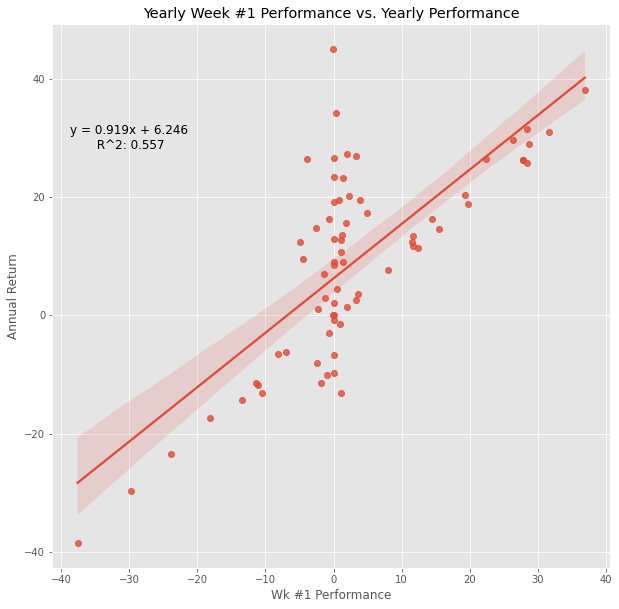

In [48]:
#Finding correlation between price change during 1st week of year and yearly price return
df = w_df[w_df["Wk"] == 1].drop(['Wk_open','Wk_end','Wk_avg','Wk_median'],axis = 1)
df2 = yr_df[["Year","P_yr"]]

df3 = pd.merge(df,df2, on = "Year").drop(index=0) # dropped 1950 since P_yr = NaN

pearson_coef, p_value = stats.pearsonr(df3['P_wk'], df3['P_yr'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value, 
      "\nIndicating the linear relationship is positive and moderately strong.",
      "Also, note that these variable are not truly independent since the weekly data is also part of the yearly data calculation.\n")

lm = LinearRegression() # create instance of linear regression model
lm.fit(df3[['P_wk']], df3['P_yr']) # fit model to data
r2 = lm.score(df3[['P_wk']], df3['P_yr']) # Calculate R^2 of linear regression
slope = lm.coef_[0]
intercept = lm.intercept_

#plot figure with regression and equation
plt.figure(figsize = (10,10))
plt.title("Yearly Week #1 Performance vs. Yearly Performance")
plt.text(-30, 30, "y = {0:.3f}x + {1:.3f}\n R^2: {2:.3f}".format(slope,intercept,r2), fontsize = 12, wrap = True,
                 horizontalalignment='center', verticalalignment='center')
s = sns.regplot(x="P_wk",y="P_yr", data = df3)
s.set(xlabel = "Wk #1 Performance", ylabel = "Annual Return")

#### What are the Top 10 monthly gains and losses for the S&P 500?

In [49]:
print("The Top 10 Monthly gains are: \n")
m_df.sort_values(by=['P_mnth','M_nm'],ascending=False).head(11).reset_index(drop=True).shift()[1:]

The Top 10 Monthly gains are: 



,Year,M_nm,M_open,M_end,M_avg,M_median,P_mnth
1,2020.0,April,2470.500000,2912.429932,2761.975226,2797.800049,17.888279
2,1974.0,October,63.389999,73.900002,69.435652,70.330002,16.579906
3,2011.0,October,1099.229980,1253.300049,1207.216187,1209.880005,14.016181
4,2009.0,March,700.820007,797.869995,757.126814,762.544983,13.848062
5,1998.0,October,986.390015,1098.670044,1032.470010,1051.955017,11.382924
6,1987.0,January,246.449997,274.079987,264.510951,266.279999,11.211195
7,1976.0,January,90.900002,100.860001,96.859524,97.129997,10.957095
8,2008.0,December,816.210022,903.250000,877.561818,874.830017,10.663919
9,1982.0,August,108.980003,119.510002,109.651364,108.760002,9.662322
10,1982.0,October,121.970001,133.720001,132.660477,134.440002,9.633516


In [50]:
print("The Top 10 Monthly losses are: \n")
m_df.sort_values(by=['P_mnth','M_nm']).head(11).reset_index(drop=True).shift()[1:]

The Top 10 Monthly losses are: 



,Year,M_nm,M_open,M_end,M_avg,M_median,P_mnth
1,1987.0,October,327.329987,251.789993,280.164092,290.389999,-23.077627
2,2008.0,October,1161.060059,968.750000,968.800874,954.090027,-16.563317
3,2020.0,March,3090.229980,2584.590088,2652.393632,2605.619995,-16.362533
4,1998.0,August,1112.439941,957.280029,1074.620472,1083.670044,-13.947711
5,2009.0,January,931.799988,825.880005,865.575500,847.915009,-11.367245
6,2009.0,February,825.440002,735.090027,805.227369,825.440002,-10.945674
7,1973.0,November,107.690002,95.959999,102.032857,102.449997,-10.892379
8,2018.0,December,2790.370117,2506.850098,2567.307386,2546.159912,-10.160660
9,1987.0,November,255.750000,230.300003,245.008501,244.825005,-9.951123
10,1974.0,September,70.519997,63.540001,68.123000,68.285000,-9.897896


Half of the top 10 greatest monthly losses occured around a recession as by quantified by the [National Bureau of Economic Research (NBER)](https://www.nber.org/research/business-cycle-dating). While 6 out of the top 10 monthly gains occured in years following a significant (top 10) monthly loss.

#### What are the Top 10 yearly gains and losses for the S&P 500?

In [51]:
print("The Top 10 Yearly gains are: \n")
yr_df.sort_values(by=['P_yr','Year'],ascending=False).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Avg_close','Max_date','Min_date'], axis = 1)

The Top 10 Yearly gains are: 



,Year,Max_close,Min_close,Med_close,Yr_open,Yr_end,P_yr
1,1954.0,35.980000,24.799999,29.510000,24.950001,35.980000,45.022170
2,1958.0,55.209999,40.330002,45.210001,40.330002,55.209999,38.059507
3,1995.0,621.690002,459.109985,548.485016,459.109985,615.929993,34.110655
4,1975.0,95.610001,70.040001,87.120003,70.230003,90.190002,31.549016
5,1997.0,983.789978,737.010010,898.700012,737.010010,970.429993,31.008182
6,2013.0,1848.359985,1457.150024,1650.404968,1462.420044,1848.359985,29.601250
7,2019.0,3240.020020,2447.889893,2919.024902,2510.030029,3230.780029,28.878070
8,1989.0,359.799988,275.309998,326.720001,275.309998,353.399994,27.250465
9,2021.0,4793.060059,3700.649902,4304.000000,3700.649902,4766.180176,26.892739
10,1998.0,1241.810059,927.690002,1094.724976,975.039978,1229.229980,26.668589


In [52]:
print("The Top 10 Yearly losses are: \n")
yr_df.sort_values(by=['P_yr','Year']).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Avg_close','Max_date','Min_date'], axis = 1)

The Top 10 Yearly losses are: 



,Year,Max_close,Min_close,Med_close,Yr_open,Yr_end,P_yr
1,2008.0,1447.160034,752.440002,1289.189941,1447.160034,903.250000,-38.485793
2,1974.0,99.800003,62.279999,84.989998,97.680000,68.559998,-29.718098
3,2002.0,1172.510010,776.760010,971.090027,1154.670044,879.820007,-23.365964
4,1973.0,120.239998,92.160004,107.514999,119.099998,97.550003,-17.365523
5,1957.0,49.130001,38.980000,44.595001,46.200001,39.990002,-14.313256
6,1966.0,94.059998,73.199997,85.564999,92.180000,80.330002,-13.090986
7,2001.0,1373.729980,965.799988,1190.539978,1283.270020,1148.079956,-13.042693
8,1962.0,71.129997,52.320000,60.960001,70.959999,63.099998,-11.809929
9,1977.0,107.000000,90.709999,98.450001,107.000000,95.099998,-11.501955
10,1969.0,106.160004,89.199997,97.820000,103.930000,92.059998,-11.361451


In [53]:
print("The average yearly return for the {0} is {1:.2f}%".format(tckr.info["shortName"],yr_df['P_yr'].mean()))

The average yearly return for the S&P 500 is 9.07%


#### What are the Top 10 after hour trading gains and losses for the S&P 500?

In [54]:
#Sorted datatable for year greater than or equal to 1991
print("The Top 10 Extended trading hour gains are: \n")
data[data['Year'] >=1991].sort_values(by=['PEx_trd','Year'],ascending=False).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Volume','M_num','M_nm','D_num','Year','Wk','Ex_trd'], axis = 1)

The Top 10 Extended trading hour gains are: 



,Date,Open,High,Low,Close,D_nm,P_intra,P_day,P_Vol,PEx_trd
1,2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,Tuesday,4.490199,4.388687,1.961179,4.784126
2,2020-03-13,2569.989990,2711.330078,2492.370117,2711.020020,Friday,8.785210,5.487571,-6.463761,3.601897
3,2020-04-06,2578.280029,2676.850098,2574.570068,2663.679932,Monday,3.972703,3.312282,5.005101,3.601556
4,2020-04-07,2738.649902,2756.889893,2657.669922,2659.409912,Tuesday,3.733344,-2.893396,10.151349,2.814526
5,2020-03-10,2813.479980,2882.590088,2734.000000,2882.229980,Tuesday,5.434897,2.443593,-9.344477,2.436499
6,2020-06-12,3071.040039,3088.419922,2984.469971,3041.310059,Friday,3.483029,-0.968075,-16.906377,2.296390
7,2020-06-16,3131.000000,3153.449951,3076.060059,3124.739990,Tuesday,2.515877,-0.199936,1.543028,2.100376
8,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,Monday,2.776901,-0.908168,77.010726,2.097204
9,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,Wednesday,1.466272,0.721272,16.698044,1.923247
10,2020-04-22,2787.889893,2815.100098,2775.949951,2799.310059,Wednesday,1.410333,0.409635,-0.515581,1.875706


In [55]:
print("The Top 10 Extended trading hour losses are: \n")
data[data['Year'] >=1991].sort_values(by=['PEx_trd','Year']).head(11).reset_index(drop=True).shift()[1:].drop(
    ['Volume','M_num','M_nm','D_num','Year','Wk','Ex_trd'], axis = 1)

The Top 10 Extended trading hour losses are: 



,Date,Open,High,Low,Close,D_nm,P_intra,P_day,P_Vol,PEx_trd
1,2020-03-16,2508.590088,2562.979980,2380.939941,2386.129883,Monday,7.645722,-4.881635,-5.777322,-7.466929
2,2020-03-12,2630.860107,2660.949951,2478.860107,2480.639893,Thursday,7.345709,-5.709928,19.734856,-4.031538
3,2020-03-18,2436.500000,2453.570068,2280.520020,2398.100098,Wednesday,7.588184,-1.576027,4.753006,-3.664807
4,2020-03-09,2863.889893,2863.889893,2734.429932,2746.560059,Monday,4.734441,-4.096870,28.554182,-3.649620
5,2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,Wednesday,3.074987,-1.104051,-9.445229,-3.347146
6,2020-03-27,2555.870117,2615.909912,2520.020020,2541.469971,Friday,3.805124,-0.563415,-20.105738,-2.821216
7,2020-02-24,3257.610107,3259.810059,3214.649902,3225.889893,Monday,1.404823,-0.973727,24.201710,-2.401015
8,2020-03-06,2954.199951,2985.929932,2901.540039,2972.370117,Friday,2.908452,0.615062,17.515581,-2.306262
9,2020-06-11,3123.530029,3123.530029,2999.489990,3002.100098,Thursday,4.135371,-3.887586,6.818763,-2.087992
10,2020-02-28,2916.899902,2959.719971,2855.840088,2954.219971,Friday,3.637454,1.279443,21.320925,-2.076707


All of the after hour top 10 gains and losses occured during 2020 most likely due to the COVID-19 pandemic and resulting fiscal and monetary support both in the United States and aboard. Based on the below Pearson correlation, the after hour trading does not appear to sigificantly correlate with the next day's price movement. After hour gains/losses do not significantly impact the next trading day's price movement.

The Pearson Correlation Coefficient is 0.256 with a P-value of P = 2.086325282953525e-66 
Indicating a small linear relationship between after hour trading and daily price changes.


[Text(0.5, 0, 'After hour trading'), Text(0, 0.5, 'Next Day Performance')]

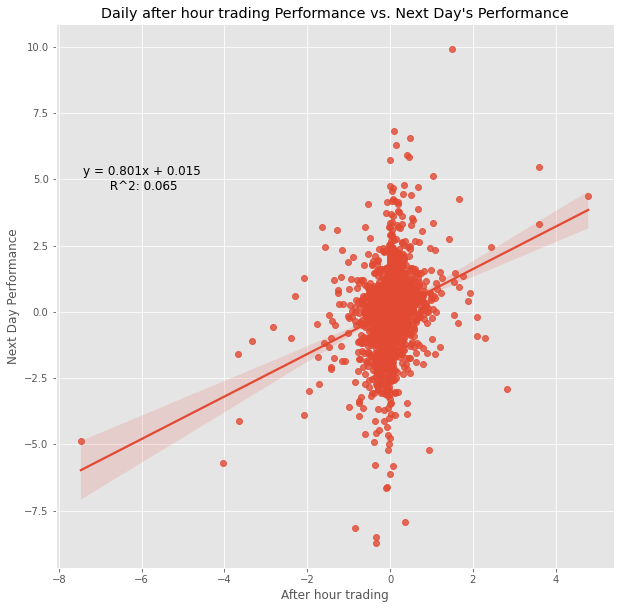

In [56]:
df4 = data[data['Year'] >=1991].dropna() # dropped years before 1991 and NaN values

pearson_coef, p_value = stats.pearsonr(df4['PEx_trd'], df4['P_day'])
print("The Pearson Correlation Coefficient is", round(pearson_coef,3), "with a P-value of P =", p_value, 
      "\nIndicating a small linear relationship between after hour trading and daily price changes.")

lm = LinearRegression() # create instance of linear regression model
lm.fit(df4[['PEx_trd']], df4['P_day']) # fit model to data
r2 = lm.score(df4[['PEx_trd']], df4['P_day']) # Calculate R^2 of linear regression
slope = lm.coef_[0]
intercept = lm.intercept_

#plot figure with regression and equation
plt.figure(figsize = (10,10))
plt.title("Daily after hour trading Performance vs. Next Day's Performance")
plt.text(-6, 5, "y = {0:.3f}x + {1:.3f}\n R^2: {2:.3f}".format(slope,intercept,r2), fontsize = 12, wrap = True,
                 horizontalalignment='center', verticalalignment='center')
s = sns.regplot(x="PEx_trd",y="P_day", data = df4)
s.set(xlabel = "After hour trading", ylabel = "Next Day Performance")

<a id="Sub-2"></a>
# *Data Visualization*

Below is a chart display the daily close for the S&P 500.

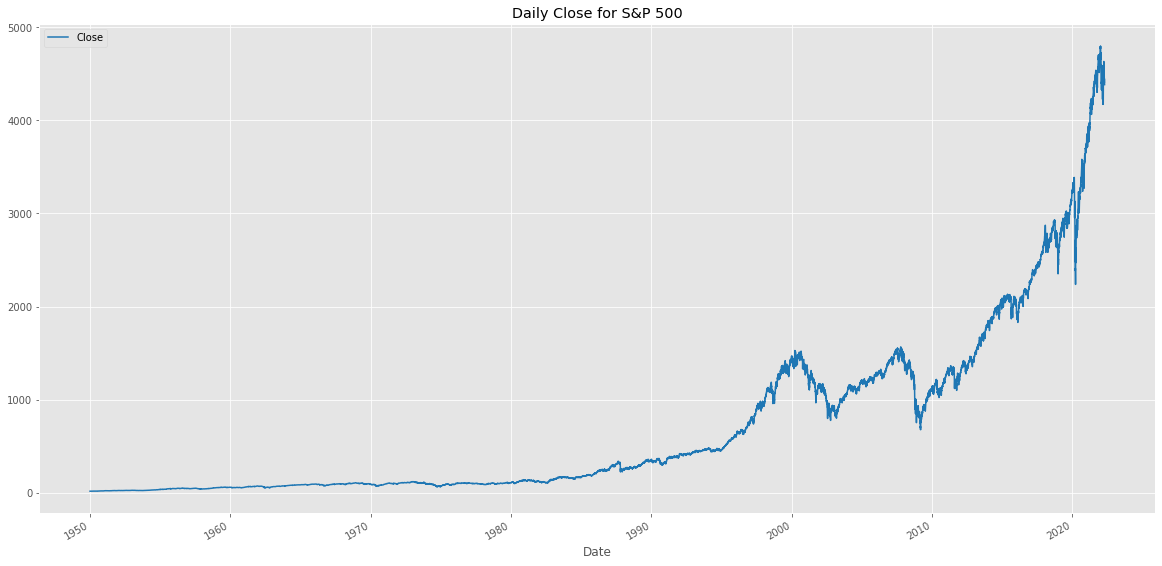

In [57]:
# Display line plot of S&P 500 Closing value vs Date
data.plot(x="Date",y="Close",title = "Daily Close for S&P 500",figsize = (20,10),colormap= 'tab10')
plt.show()

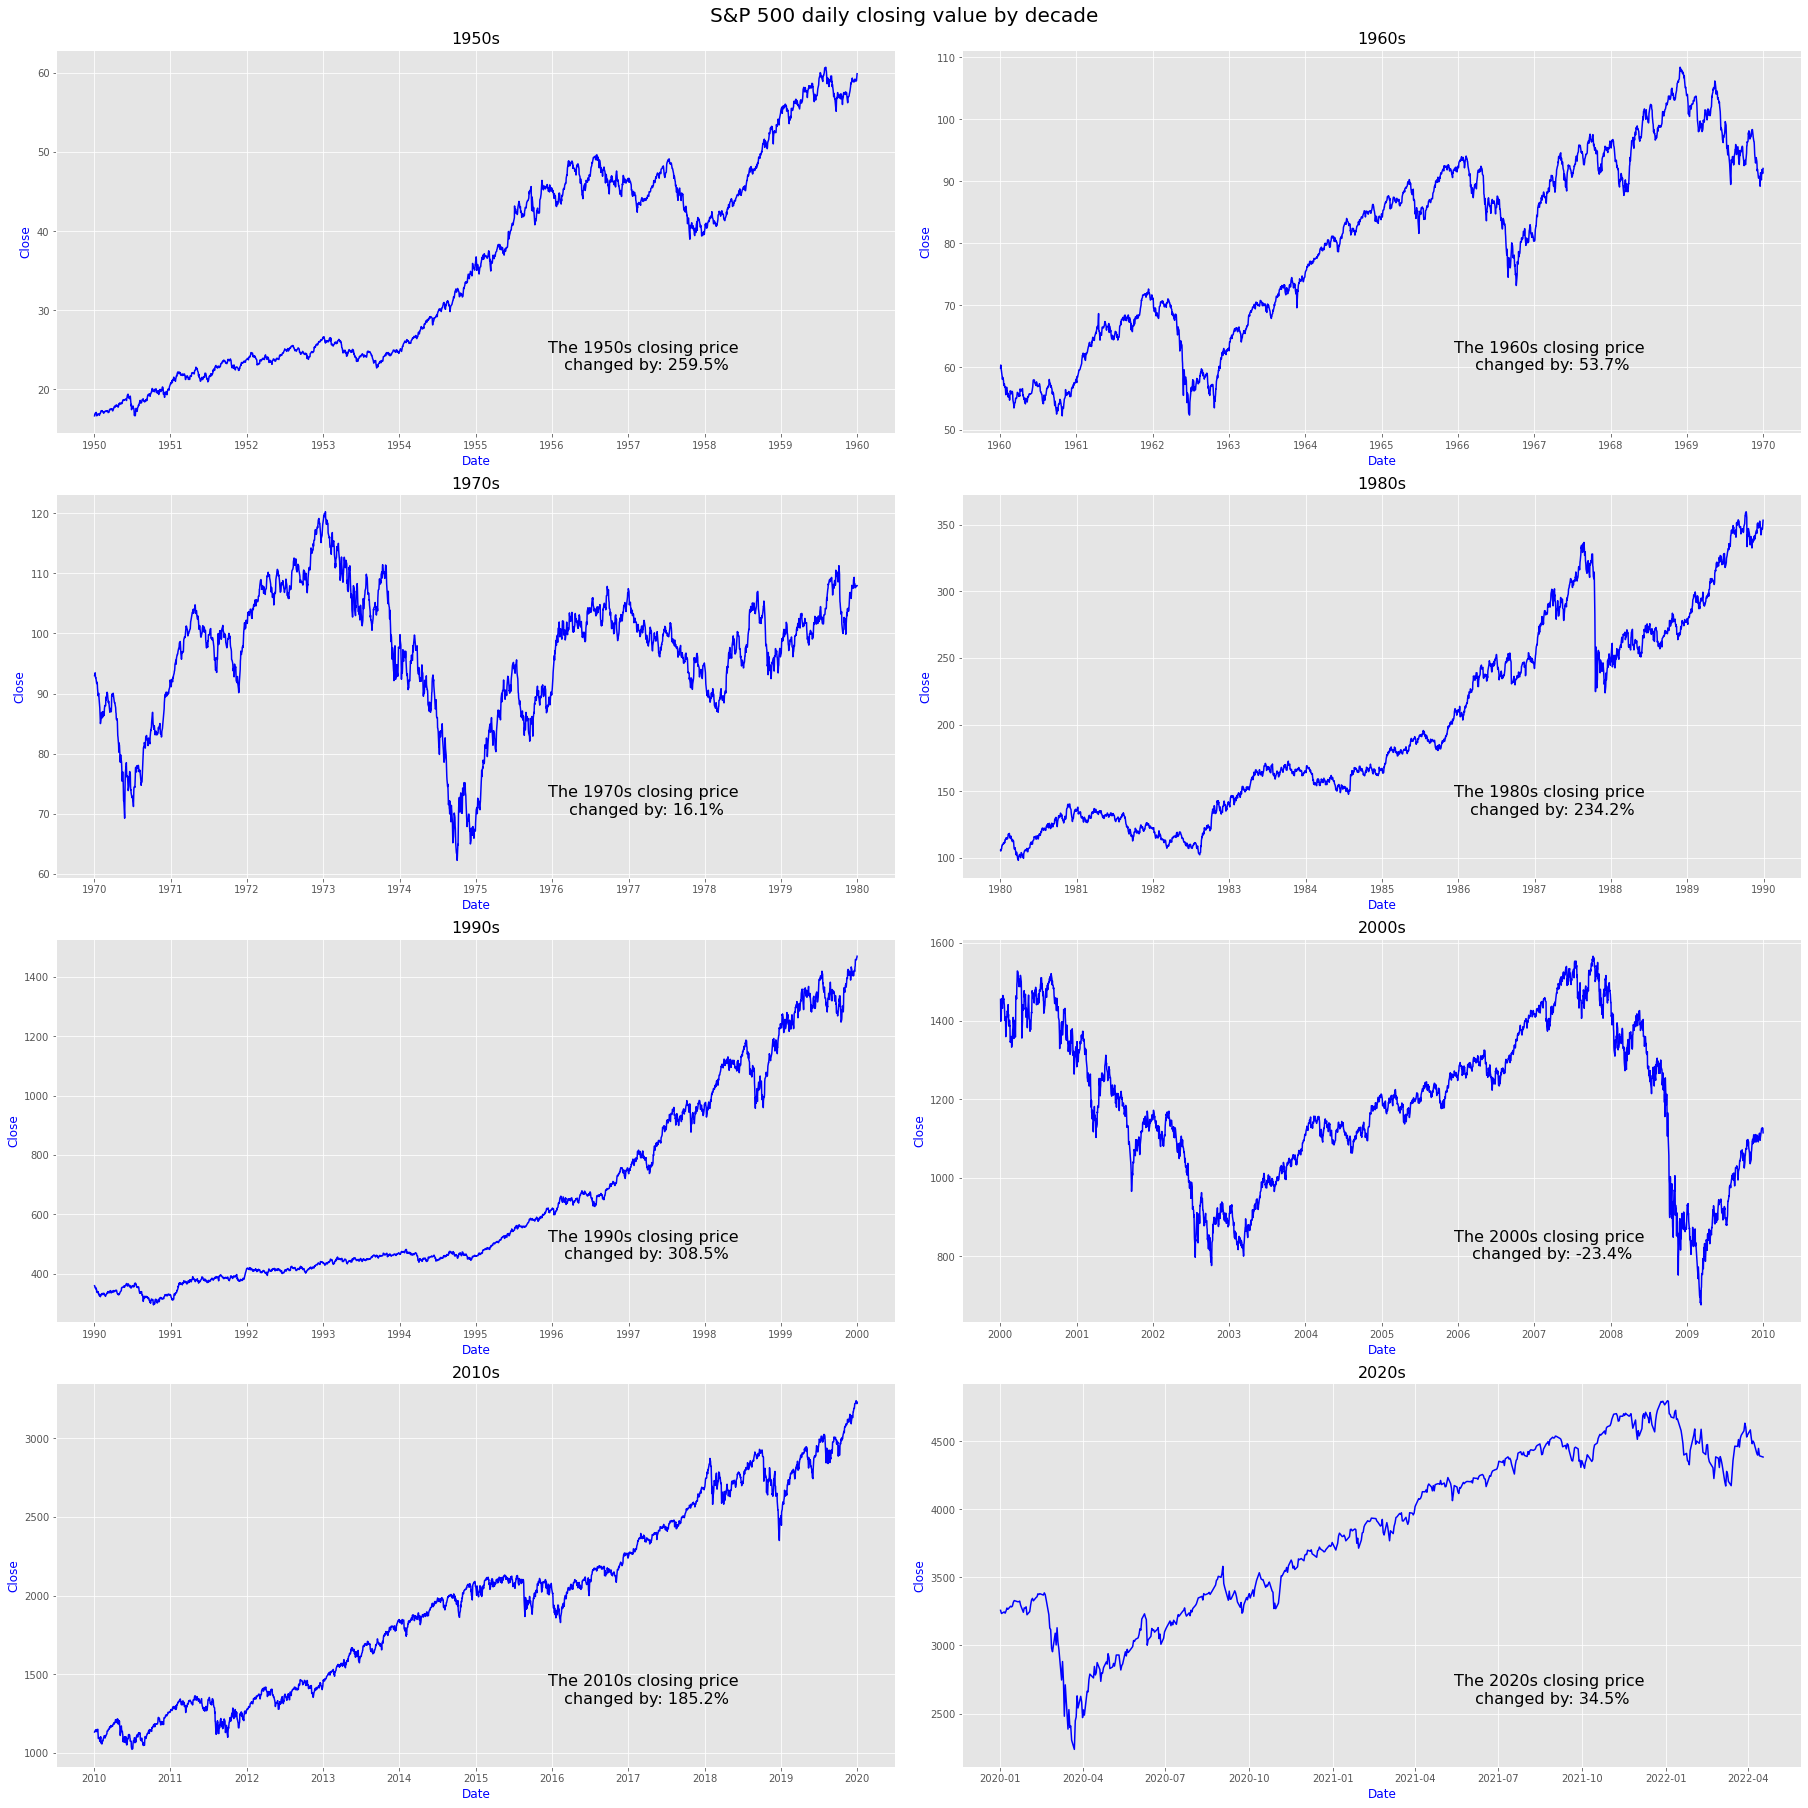

In [58]:
## find year that are divisible by 10
decade = list(data[data['Year']%10 == 0]['Year'].unique())

#Create figure for subplots
fig,ax = plt.subplots(nrows = int(round(len(decade)/2)), ncols =2, figsize=(25,25), constrained_layout=True)
plt.suptitle("S&P 500 daily closing value by decade",fontsize = 20)

#Loop through each row and column to create plot for each decade
i = 0
for row in ax:
    for col in row:
        start = decade[i]
        if i == (len(decade) - 1): #If at last 10s then just pull last 'year' from dataframe
            end = data['Year'].tail(1).loc[0:'Year'].iloc[0]+1
        else:
            end = decade[i+1]
            
        #Set title for plot
        col.set_title(str(start)+'s', fontsize = 16)
        
        #Pull data for each decade
        x = data[(data['Year'] >= start) & (data['Year'] < end )]['Date'].dt.date
        y = data[(data['Year'] >= start) & (data['Year'] < end )]['Close']  
    
        #Plot closing data, set title and axes labels
        col.plot(x,y,'-b')
        col.set_xlabel("Date", color = 'blue')
        col.set_ylabel("Close", color = 'blue')
        
        gain = p_chg(y.iloc[0],y.iloc[-1]) #Calculate decade gain from first trading day until last trading day
        col.text(0.7, 0.2, "The {0}s closing price\n changed by: {1:.1f}%".format(start,gain), fontsize = 16, wrap = True,
                 horizontalalignment='center', verticalalignment='center', transform=col.transAxes)
        i += 1
        if i == len(decade): #Once index equals length of decade list stop iterating through loop
            break

plt.show()

The below chart shows the annual returns in the S&P 500. Overall, there are significantly more positive years than negative years. And it is rare to have a decline of 20% or more.

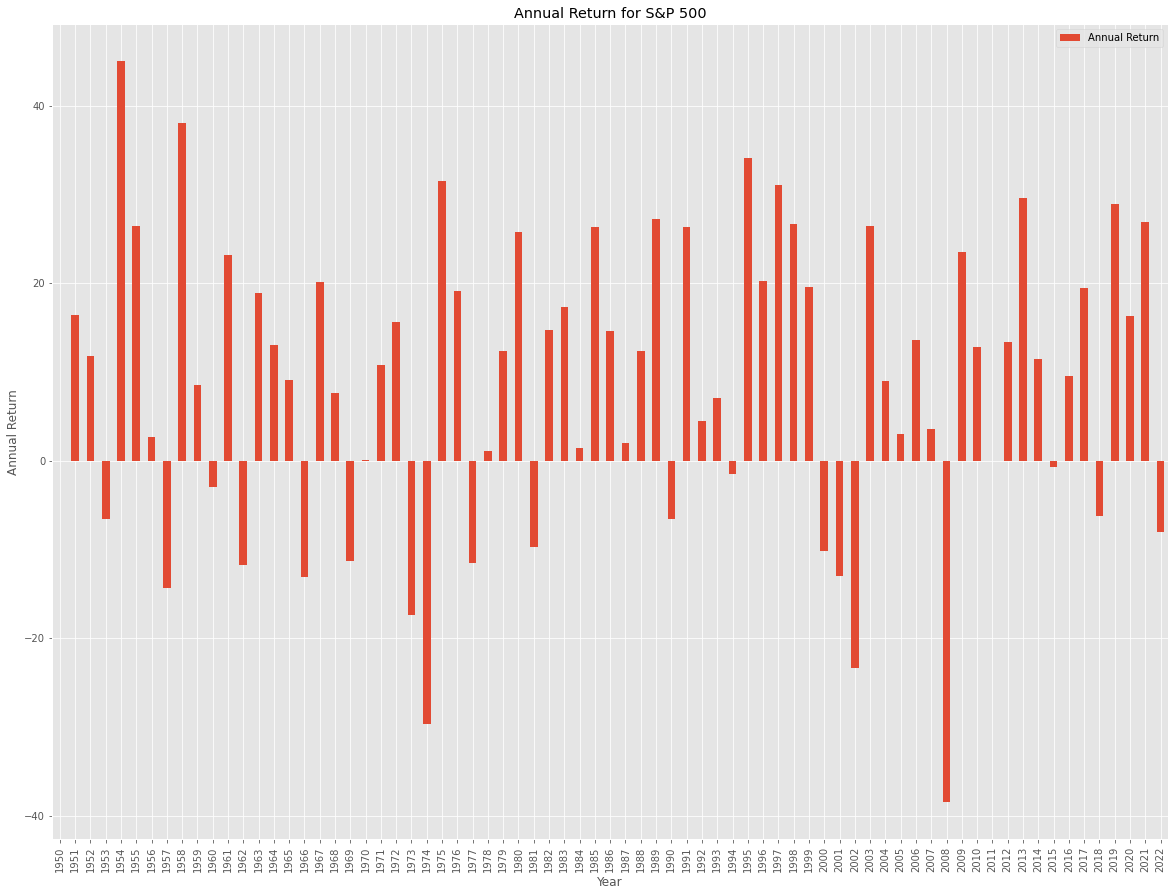

In [59]:
yr_df.plot.bar(x='Year',y='P_yr',color='C0', label='Annual Return', figsize = (20,15))

plt.title('Annual Return for S&P 500')

plt.ylabel("Annual Return")
plt.xlabel("Year")

plt.show()

The below histogram displays the frequency of the S&P 500 annual returns.

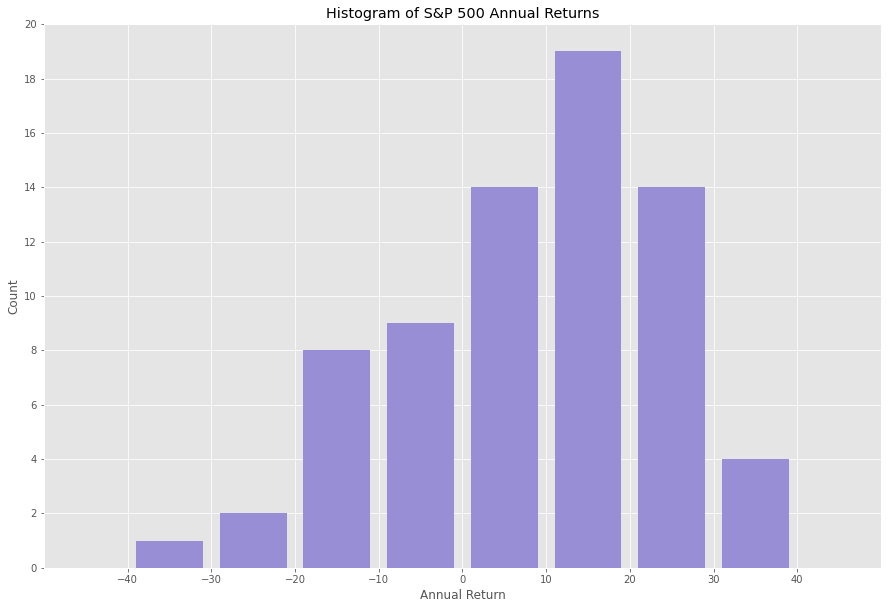

In [60]:
#getting high and low bounds for chart
high = int(round(yr_df['P_yr'].max()/10,0))*10
low = int(round(yr_df['P_yr'].min()/10,0))*10

#creating bins and setting bin width
count, bin_edges = np.histogram(yr_df.loc[1:,'P_yr'],bins=(range(low,high,10)))
x_min = bin_edges[0] - 10
x_max = bin_edges[-1] + 10

#Find max count a round up to nearest even number
if (count.max()%2 == 0):
    ymax = 20
else:
    ymax = count.max() +2

#Plot histogram of annual returns
yr_df.loc[1:,'P_yr'].plot.hist(bins=(range(low,high,10)), color='C9', figsize = (15,10), xticks = bin_edges, 
                               xlim = (x_min,x_max), yticks =range(0,ymax,2), rwidth = 0.8)
plt.xlabel("Annual Return")
plt.ylabel("Count")
plt.title("Histogram of S&P 500 Annual Returns")
plt.show()

In [61]:
print("Out of {0} years worth of data, there has only been {1} years where the annual return has been less than -20%. But there have been {2} years (or {4:.2%}) with \
an annual return greater than 0% and {3} (or {5:.2%}) years with an annual return greater than 6% (30 year treasury yield in 2000)."
      .format(yr_df['Year'].count(),yr_df[yr_df['P_yr'] < -20].value_counts().count(),
              yr_df[yr_df['P_yr'] > 0].value_counts().count(),yr_df[yr_df['P_yr'] > 6].value_counts().count(),
             yr_df[yr_df['P_yr'] > 0].value_counts().count()/yr_df['Year'].count(),yr_df[yr_df['P_yr'] > 6].value_counts().count()/yr_df['Year'].count()))

Out of 73 years worth of data, there has only been 3 years where the annual return has been less than -20%. But there have been 52 years (or 71.23%) with an annual return greater than 0% and 44 (or 60.27%) years with an annual return greater than 6% (30 year treasury yield in 2000).


The below chart displays the daily trading volume.

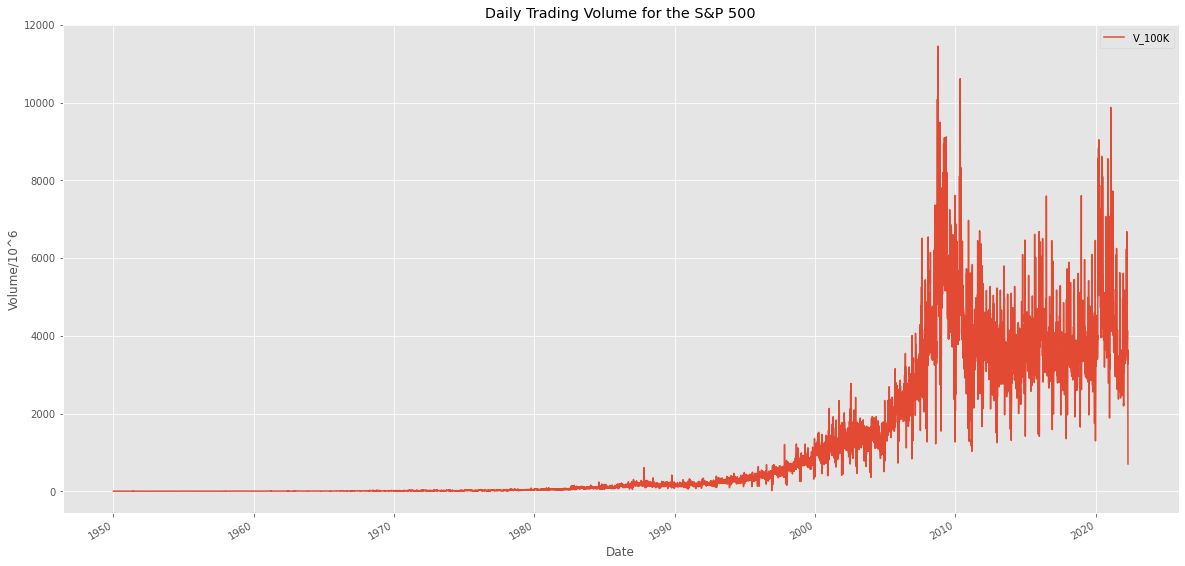

In [62]:
yr_vol = data[["Date",'Volume']]
yr_vol = yr_vol.assign(V_100K = round(yr_vol['Volume']/(10**6),3))
yr_vol.drop(columns='Volume')

yr_vol.plot(x="Date",y="V_100K",title = "Daily Trading Volume for the S&P 500", figsize = (20,10))
plt.ylabel("Volume/10^6")
plt.xlabel("Date")

plt.show()

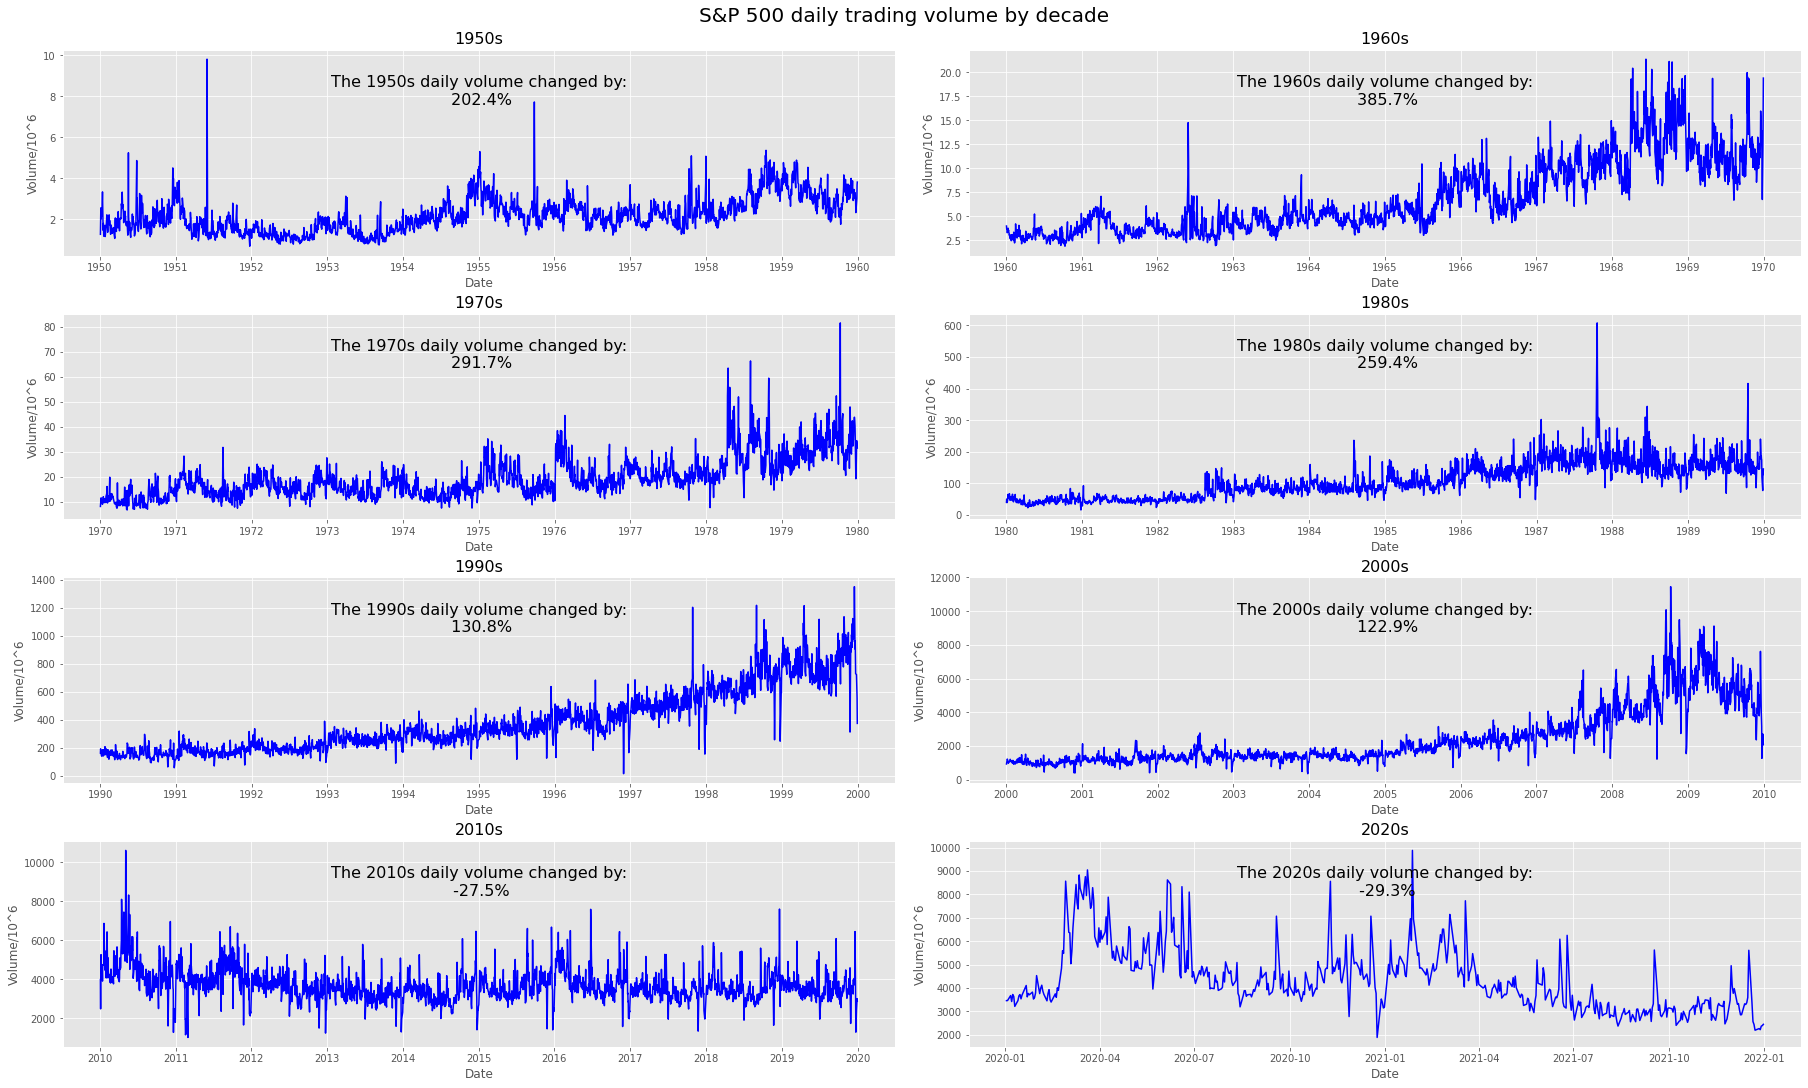

In [63]:
## find year that are divisible by 10
decade = list(data[data['Year']%10 == 0]['Year'].unique())

#Create figure for subplots
fig,ax = plt.subplots(nrows = int(round(len(decade)/2)), ncols =2, figsize=(25,15), constrained_layout=True)
plt.suptitle("S&P 500 daily trading volume by decade",fontsize = 20)

i = 0
for row in ax:
    for col in row:
        start = decade[i]
        if i == (len(decade) - 1):
            end = data['Year'].tail(1).loc[0:'Year'].iloc[0]
        else:
            end = decade[i+1]
        x = data[(data['Year'] >= start) & (data['Year'] < end )]['Date']
        y = data[(data['Year'] >= start) & (data['Year'] < end )]['Volume']/(10**6)   
        col.plot(x,y, color = 'blue')
        col.set_title(str(start)+'s', fontsize = 16)
        col.set_xlabel("Date")
        col.set_ylabel("Volume/10^6")
        gain = p_chg(y.iloc[0],y.iloc[-1])
        col.text(0.5, 0.8, "The {0}s daily volume changed by:\n {1:.1f}%".format(start,gain), fontsize = 16, wrap = True,
                 horizontalalignment='center', verticalalignment='center', transform=col.transAxes)
        i += 1
        if i == len(decade):
            break

plt.show()

The below box chart displays the monthly volatility of the S&P 500. Are there some months that historically display more volatility than others? Based on the below chart October has the highest and lowest outliers. This was previous examined in the Data Analysis section as being associated with the 2008 GFC and 1987 Black Monday.

Text(-150, 30, 'Black Monday \n 20.47% Drop')

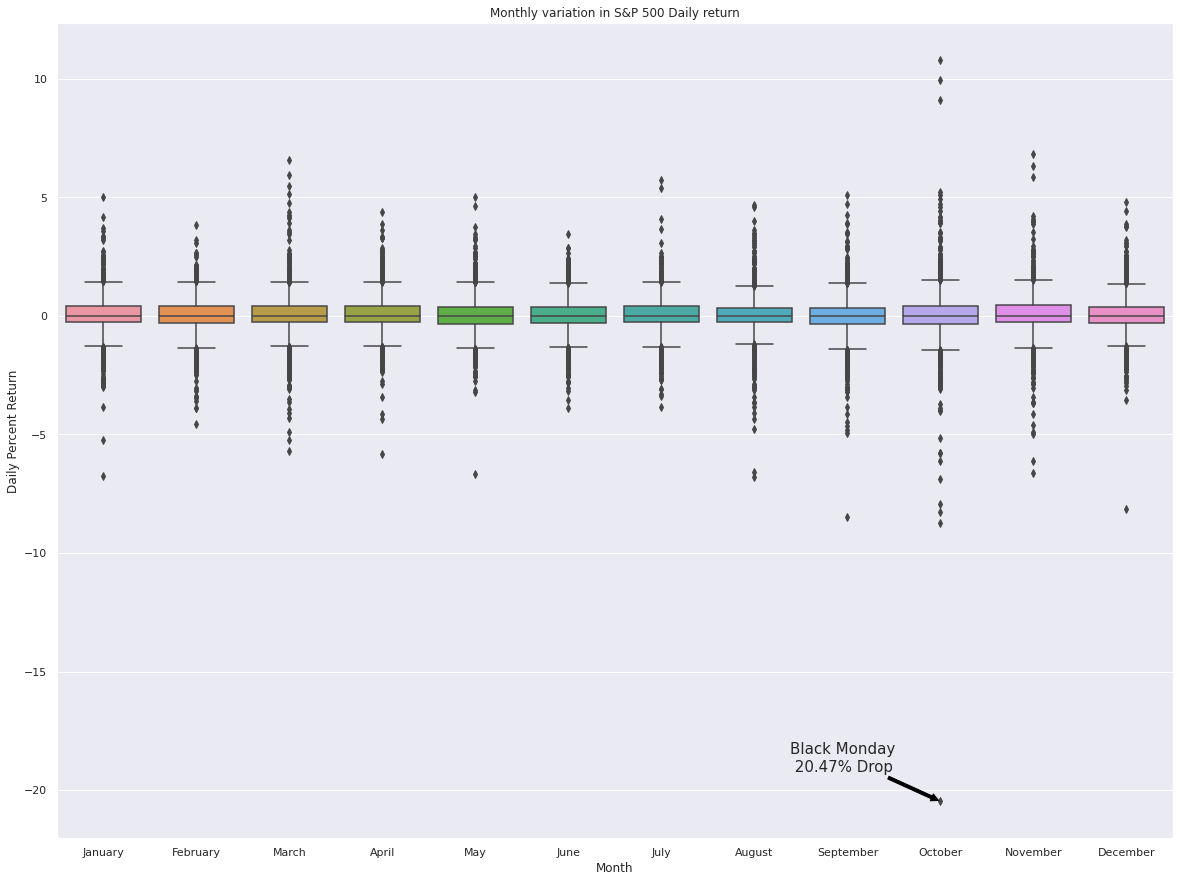

In [64]:
#Display box plot for each month showing percent changes per day
sns.set(rc = {'figure.figsize':(20,15)}) #Set figure size

sns.boxplot(x='M_nm',y='P_day', data =data)
plt.title("Monthly variation in S&P 500 Daily return")
plt.xlabel("Month")
plt.ylabel("Daily Percent Return")

plt.annotate("Black Monday \n 20.47% Drop",xy = (9,-20.47), xycoords='data', xytext=(-150, 30), fontsize = 15, 
            textcoords='offset points', arrowprops=dict(arrowstyle="simple",color="black"))

Below is a box chart displaying the daily volatility of the S&P 500 for each weekday. Based on the below chart Monday lowest outliers and Tuesday has the highest outlier. This was previous examined in the Data Analysis section as being associated with the 2008 GFC and 1987 Black Monday.

Text(0, 0.5, 'Daily Percent Return')

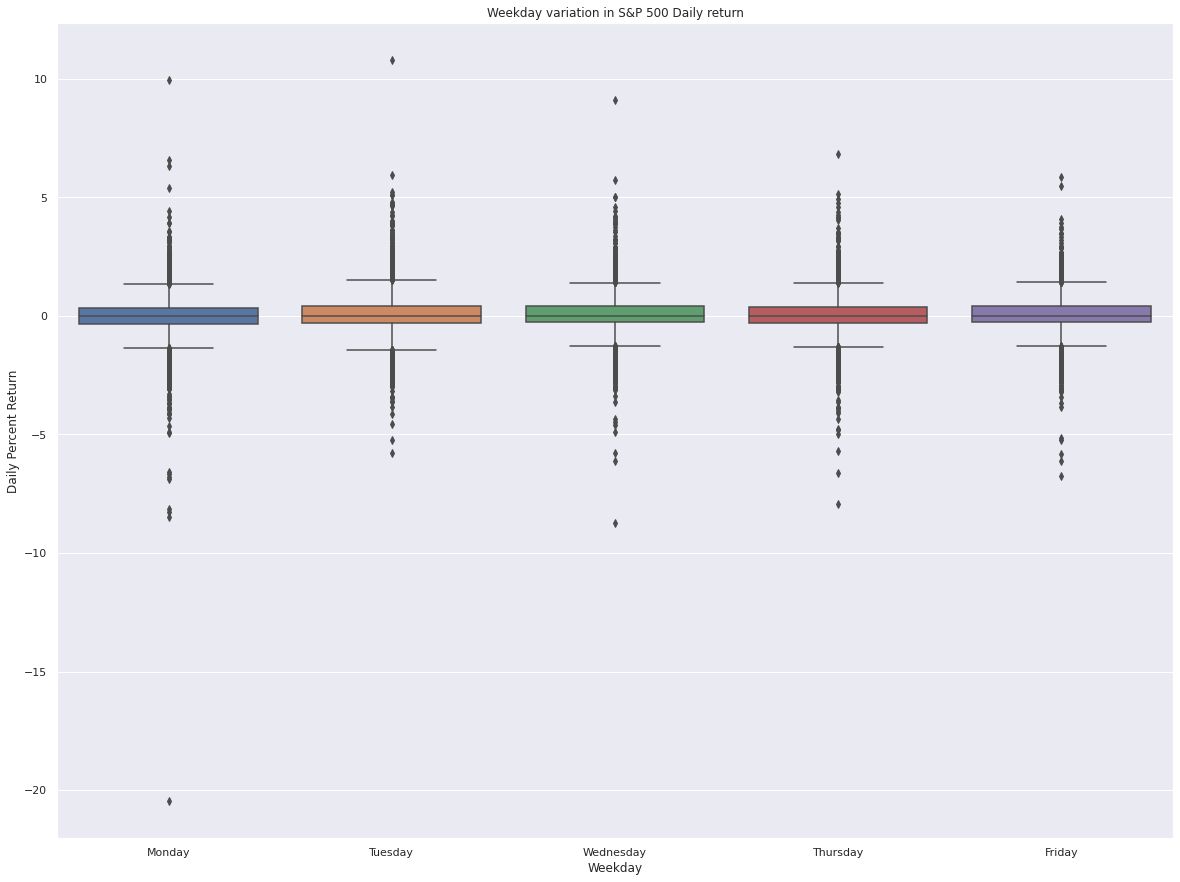

In [65]:
#Display box plot for each month showing percent changes per day
index_dy = ['Monday','Tuesday','Wednesday','Thursday','Friday'] # Reorder index
sns.set(rc = {'figure.figsize':(20,15)}) #Set figure size
sns.boxplot(x='D_nm',y='P_day', data =data, order = index_dy)

plt.title("Weekday variation in S&P 500 Daily return")
plt.xlabel("Weekday")
plt.ylabel("Daily Percent Return")

Text(0, 0.5, 'Daily Percent Return')

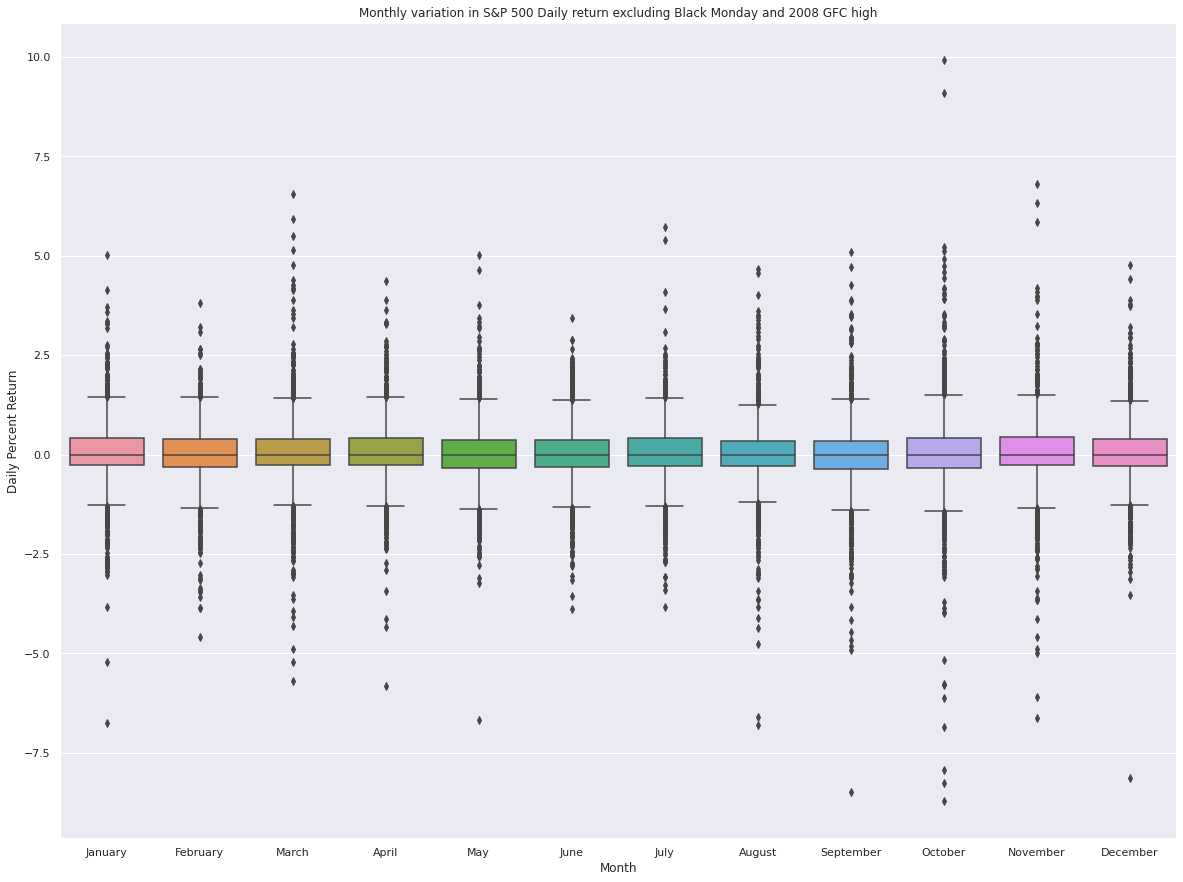

In [66]:
# Remove Black Friday and 2008 GFC data from mnth_df
# find index value for both October max and min
mth_max = data[(data['P_day'] == data['P_day'].max()) & (data['M_nm'] == "October")].index[0]
mth_min =data[(data['P_day'] == data['P_day'].min()) & (data['M_nm'] == "October")].index[0]

data2 = data.drop(labels = [mth_min, mth_max], axis = 0) # drop two rows from data df

#Display box plot for each month showing percent changes per day
sns.set(rc = {'figure.figsize':(20,15)}) #Set figure size

sns.boxplot(x='M_nm',y='P_day', data =data2)
plt.title("Monthly variation in S&P 500 Daily return excluding Black Monday and 2008 GFC high")
plt.xlabel("Month")
plt.ylabel("Daily Percent Return")

Text(0, 0.5, 'Daily Percent Return')

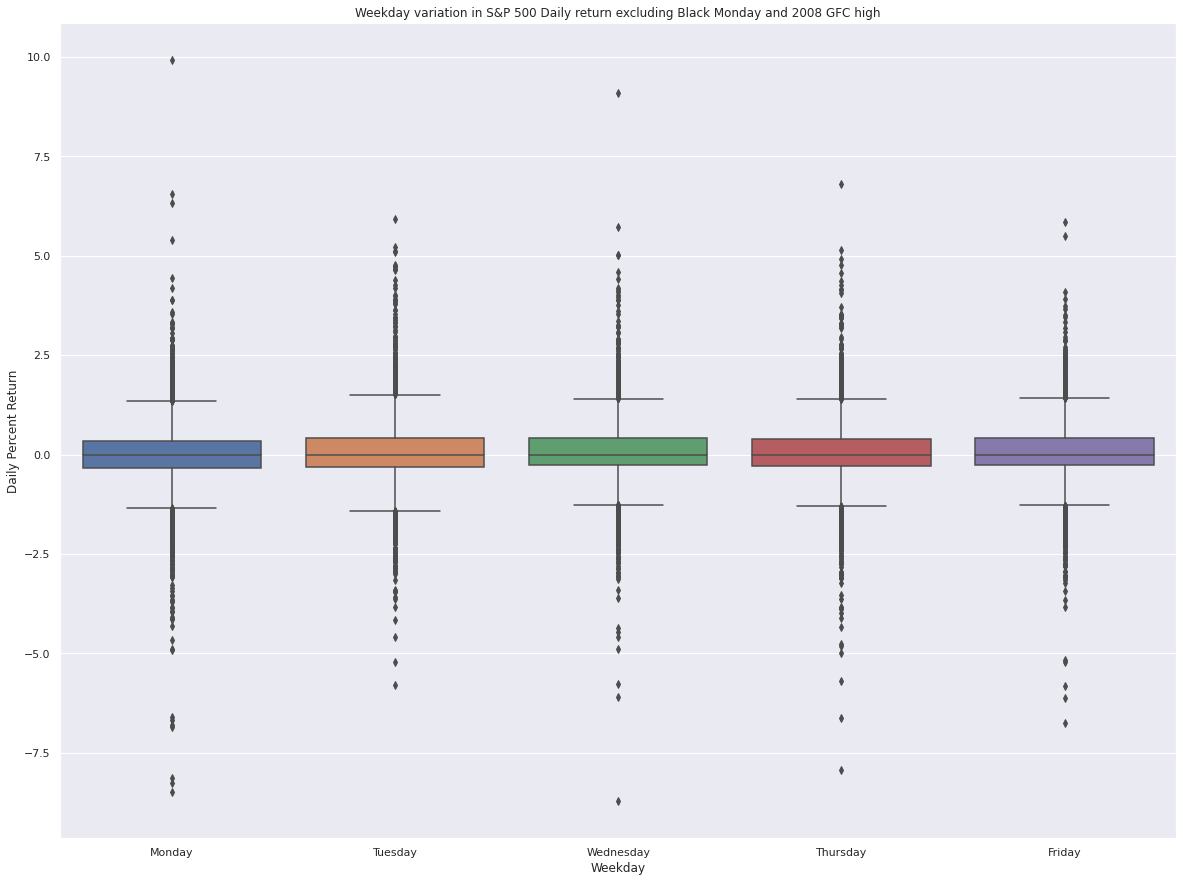

In [67]:
#Display box plot for each month showing percent changes per day
index_dy = ['Monday','Tuesday','Wednesday','Thursday','Friday'] # Reorder index
sns.set(rc = {'figure.figsize':(20,15)}) #Set figure size
sns.boxplot(x='D_nm',y='P_day', data =data2, order = index_dy)

plt.title("Weekday variation in S&P 500 Daily return excluding Black Monday and 2008 GFC high")
plt.xlabel("Weekday")
plt.ylabel("Daily Percent Return")

The month of October has the highest and lowest percent daily change while also having the widest average and standard deviation. The lowest value of -20.47% occurred on [Black Monday](https://www.federalreservehistory.org/essays/stock-market-crash-of-1987) and its highest value occurred during the [2008 Global Financial Crisis](https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath). Even when these two values are removed (as shown above), October still produces daily percent changes that are higher and lower than the other months - although they are more inline

<a id="Summary"></a>
# Summary

Based on the above analysis, we can concluded the following:

1) **October** is the most volatile month, with the largest daily price increase and decreases. Note that even after removing the largest price swings, the daily price variation for October is still significantly above the remaining months. October is the only month the a daily price variation greater than 1%.

2) **Monday** is the most volatile day, having the largest daily price variation. This could potential be due to events that occured after close on Friday and throughout the weekend being priced into the market on Monday.

3) Large price gains occur around **market downturns/unrest**. Seven (7) of the top ten (10) largest daily percent price occured during the 2008 GFC. 

4) **Week #1** performance is a decent indicator of how the S&P500 will perform for the rest of the year. The larger the weekly gain/decline the more likely that the yearly performance will follow the same trend.

5) Large daily price movements with price moves are rare. Daily price moves of **greater than or equal to 1%** occur less than 5% of the time. However, annual returns have been positive in **71%** of the years. Annual returns greater than 6% (30 year treasury yield in 2000 - risk free earning) have occurred **60%** of the time. 

6) The only decade to not produced a price gain was to 2000s which started with the 2000 tech bubble and ended with the 2008 Global Financial Crisis. Every other decade has produced a positive return. **It pays to stay in the market longterm.**


# Next Steps

1) Perform similiar analysis on other indices (like Dow 30, Nasdaq, or Russell). See how they compare with S&P500 over similar timeframe. Since the S&P 500 tracks large cap companies it will be interesting to see how mid and small cap companies compare with its performance.

2) Take a deeper dive into what could be effecting the trends, does the Federal Reserve short term interest rate explain periods of great gains? The short term interest rate has been relatively low since the 2008 GFC and the S&P500 has quadrupled during this time. What about the M2 money supply? Does more money in circulation mean higher returns? How does GDP and CPI affect these annual returns?